In [2]:
def ensure_dir(dn):
    if not os.path.exists(dn):
        os.makedirs(dn)


In [17]:
import glob, os
studydir = "."
datad  = os.path.join(studydir,"datain")
resd   = os.path.join(studydir,"ress")
imgdir = os.path.join(studydir,'qNML_images')
tbldir = os.path.join(studydir,"tables")

ensure_dir(imgdir)
ensure_dir(tbldir)

scoretypes = [os.path.split(d)[-1] for d in glob.glob(os.path.join(resd,'*'))]
scoretypes = sorted(scoretypes,key=str.upper)
datanames = open(os.path.join(studydir,"datasR.txt")).read().split()

def get_resd(st,dd):
    return os.path.join(resd,st,dd)

def u1(x):
    return x[0].upper()+x[1:]

def fmt_dn(dn):
    return ''.join(map(u1,dn.split('_')))
scoretypes, datanames

(['BDeu', 'BIC', 'fNML', 'qNML'],
 ['adult',
  'wine',
  'heart_statlog',
  'heart_hungarian',
  'heart_cleveland',
  'page_blocks',
  'glass',
  'bc_wisconsin',
  'tic_tac_toe',
  'shuttle',
  'breast_cancer',
  'yeast',
  'post_operative',
  'diabetes',
  'abalone',
  'ecoli',
  'liver',
  'thyroid',
  'iris',
  'balance'])

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np

A slow test to check that everything is ok

In [6]:

def onereptest(st,dn,r):
    resfn = os.path.join(resd,st,dn,"%d.ssp"%r)
    a = np.fromfile(resfn,sep=' ')
    return a.shape == (19*4,)

def allreptest():
    for (dix, dn) in enumerate(datanames):
        for (six, st) in enumerate(scoretypes):
            for r in  xrange(1000):
                try:
                    if not onereptest(st,dn,r):
                        print(st, dn, r)
                except:
                    pass

Load one prediction column

In [18]:
import numpy as np

def gen_resfiles(st,dn):
    return glob.glob(os.path.join(resd,st,dn,'*.ssp'))

def onerep(resfn,col):
        a = np.fromfile(resfn,sep=' ').reshape(-1,5)
        return a[:,col]

qsubtmpl="qsub -N %s.%s -o /dev/null -e qNMLerr.txt run1overss.sh %s %s"

def gen_stack(st,dn,col,verbose=False):
    for rfn in gen_resfiles(st,dn):
        try:
            yield onerep(rfn,col)
        except:
            if verbose:
                print('Error in ',rfn)
                r = os.path.basename(rfn).split('.')[0]
                print(qsubtmpl%(dn,r,dn,r))
    
def one_dat(st,dn,col,verbose=False):
    return np.vstack(list(gen_stack(st,dn,col,verbose)))

one_dat('fNML','wine',3).shape

(1000, 9)

## Predictive performance by sample size (average over 1000 train and test runs) 

In [9]:
lstyle = {'BIC':'-.', 'BDeu':':', 'fNML':'--', 'qNML':'-'}

In [10]:
def get_sample_sizes(dn):
    ssfile = gen_resfiles('fNML',dn)[0]
    return np.array([l.split()[0] for l in open(ssfile)],dtype=int)


In [20]:
datas={}
for dn in datanames:
    for st in scoretypes:
        for col in (2,3,4):
            print (dn,st,col)
            datas[(st,dn,col)] = one_dat(st,dn,col)


('adult', 'BDeu', 2)
('adult', 'BDeu', 3)
('adult', 'BDeu', 4)
('adult', 'BIC', 2)
('adult', 'BIC', 3)
('adult', 'BIC', 4)
('adult', 'fNML', 2)
('adult', 'fNML', 3)
('adult', 'fNML', 4)
('adult', 'qNML', 2)
('adult', 'qNML', 3)
('adult', 'qNML', 4)
('wine', 'BDeu', 2)
('wine', 'BDeu', 3)
('wine', 'BDeu', 4)
('wine', 'BIC', 2)
('wine', 'BIC', 3)
('wine', 'BIC', 4)
('wine', 'fNML', 2)
('wine', 'fNML', 3)
('wine', 'fNML', 4)
('wine', 'qNML', 2)
('wine', 'qNML', 3)
('wine', 'qNML', 4)
('heart_statlog', 'BDeu', 2)
('heart_statlog', 'BDeu', 3)
('heart_statlog', 'BDeu', 4)
('heart_statlog', 'BIC', 2)
('heart_statlog', 'BIC', 3)
('heart_statlog', 'BIC', 4)
('heart_statlog', 'fNML', 2)
('heart_statlog', 'fNML', 3)
('heart_statlog', 'fNML', 4)
('heart_statlog', 'qNML', 2)
('heart_statlog', 'qNML', 3)
('heart_statlog', 'qNML', 4)
('heart_hungarian', 'BDeu', 2)
('heart_hungarian', 'BDeu', 3)
('heart_hungarian', 'BDeu', 4)
('heart_hungarian', 'BIC', 2)
('heart_hungarian', 'BIC', 3)
('heart_hungaria

In [21]:
def ss_image(ylabel,col,f,outname):
    for (dix, dn) in enumerate(datanames):
        plt.figure(figsize=(12,6))
        plt.rcParams.update({'font.size':22})
        ss = get_sample_sizes(dn)
        plt.title(fmt_dn(dn))
        plt.xlabel('Sample size')
        plt.ylabel(ylabel)
        for (six, st) in enumerate(scoretypes):
            ds = datas[(st,dn,col)]
            plt.plot(ss,f(ds,axis=0),lw=4,linestyle=lstyle[st],label=st)
        plt.legend(loc='best')
        plt.savefig(imgdir+'/%s_%s.pdf' % (dn,outname), bbox_inches='tight')
        

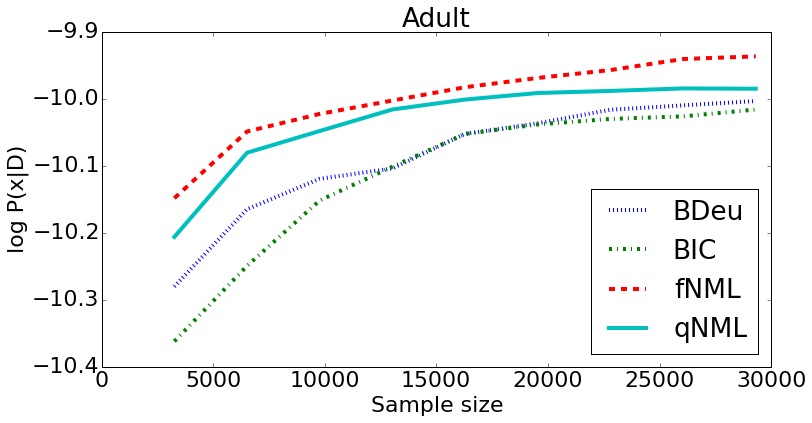

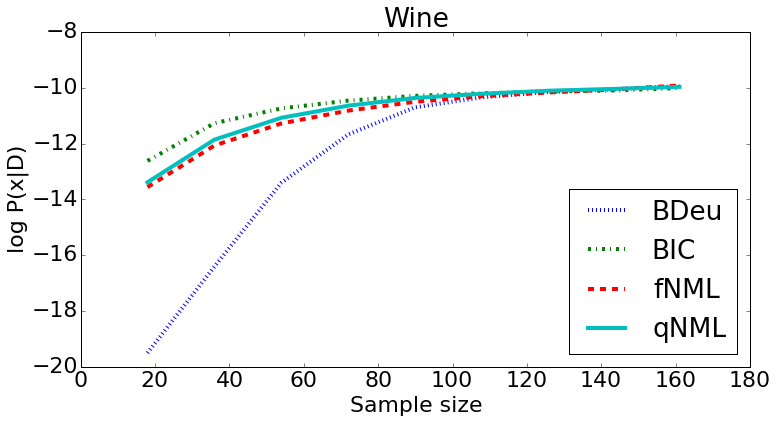

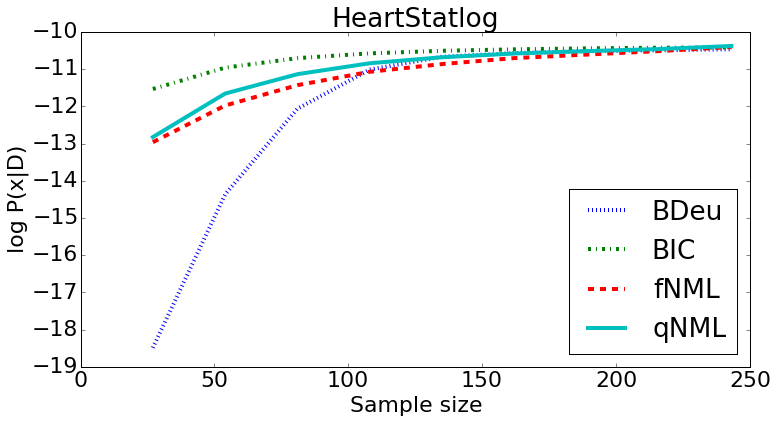

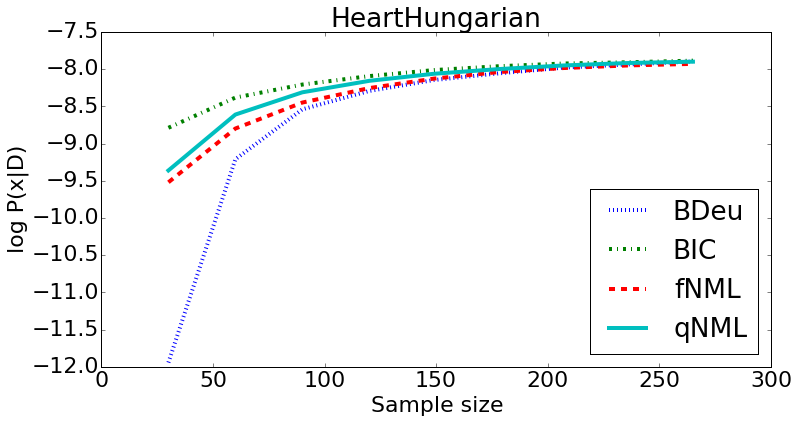

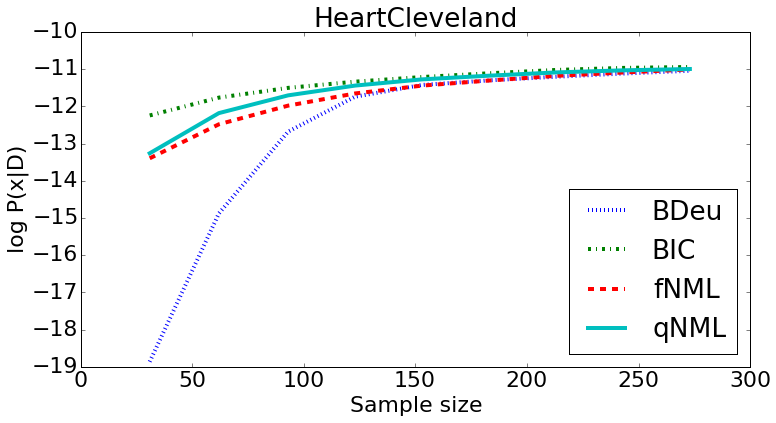

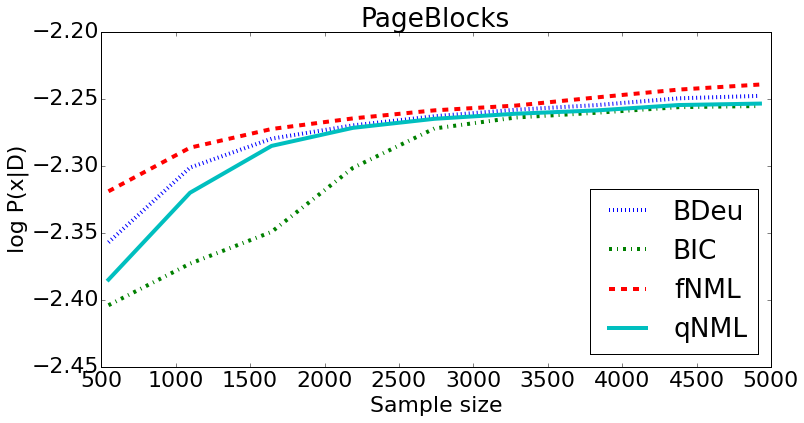

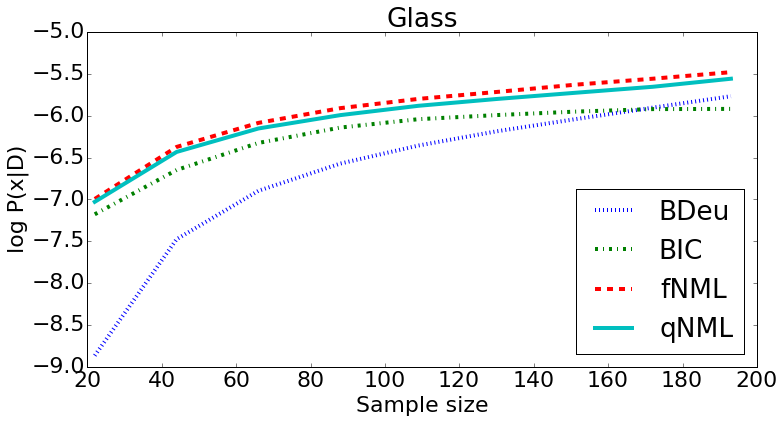

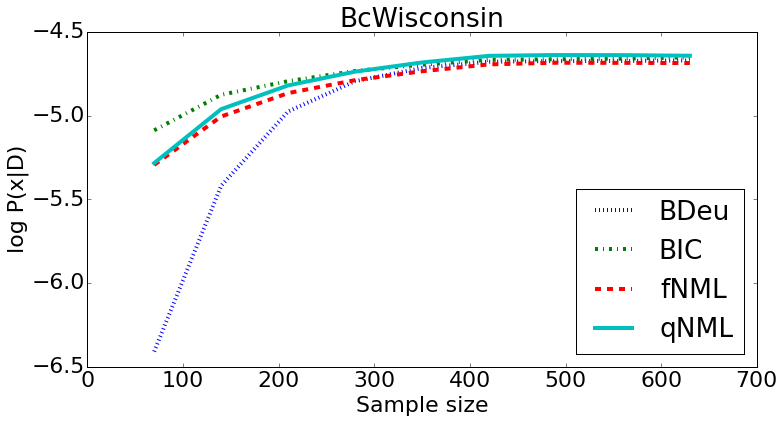

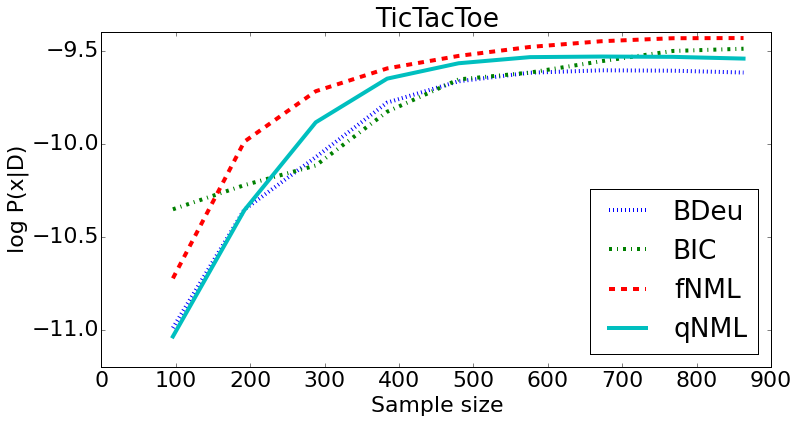

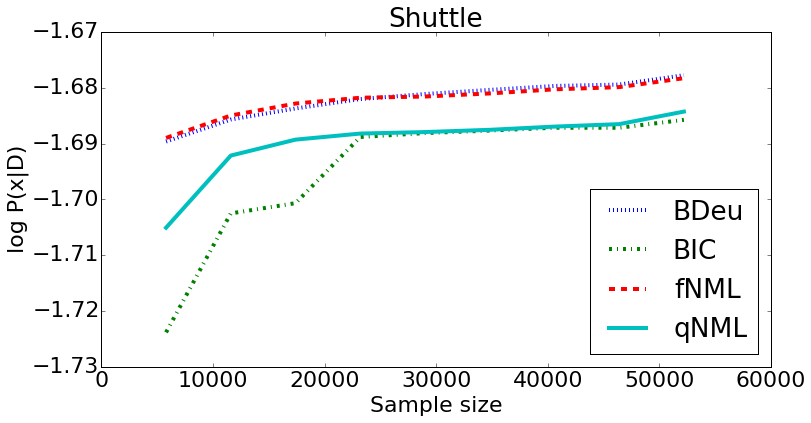

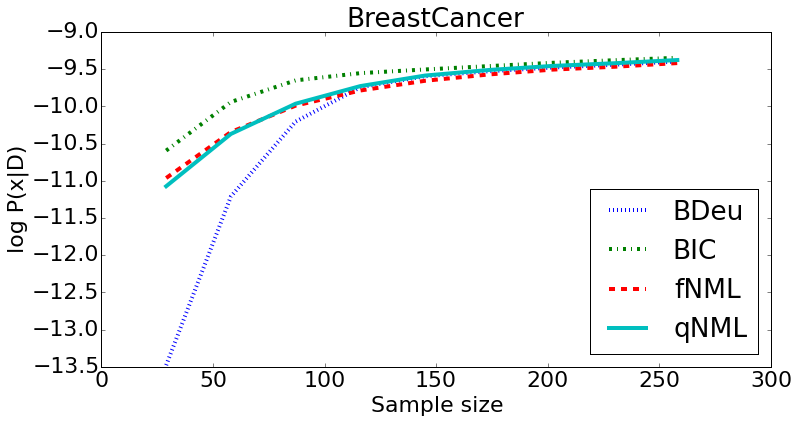

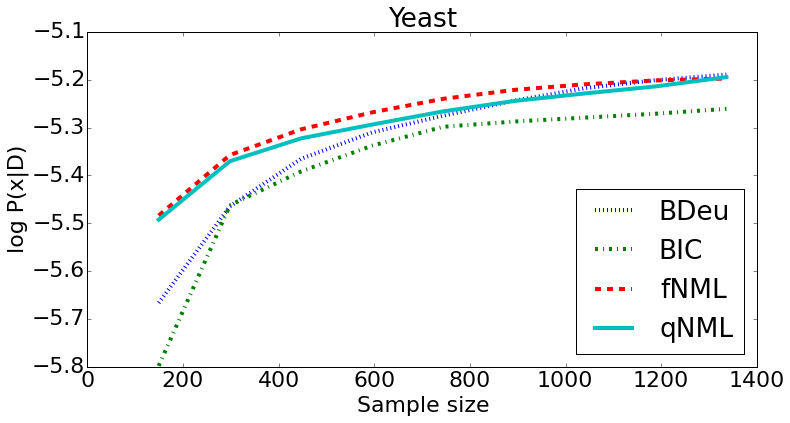

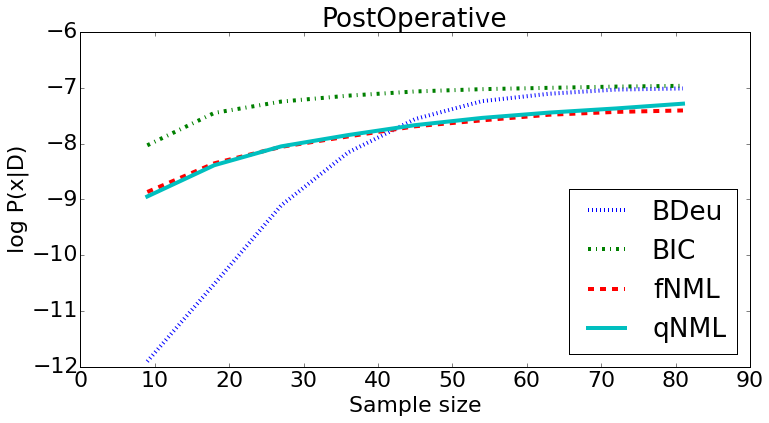

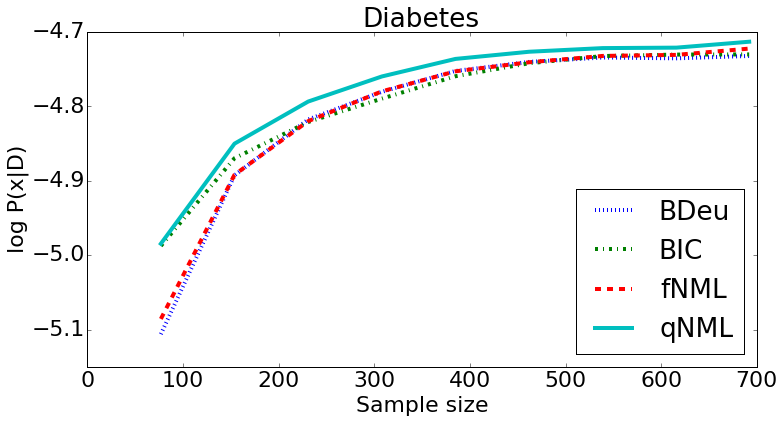

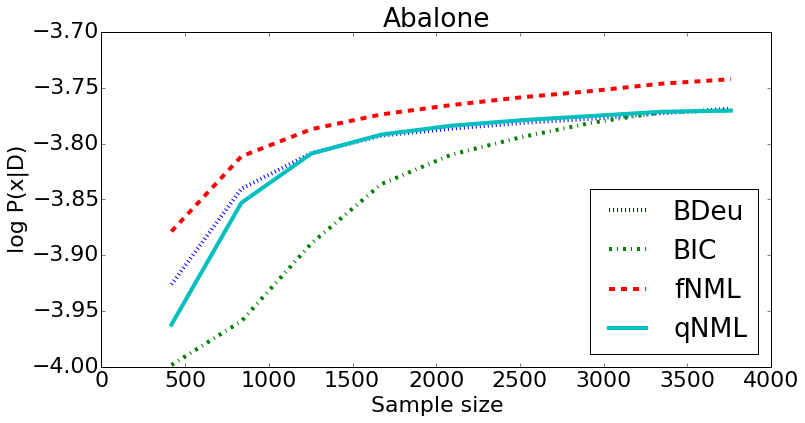

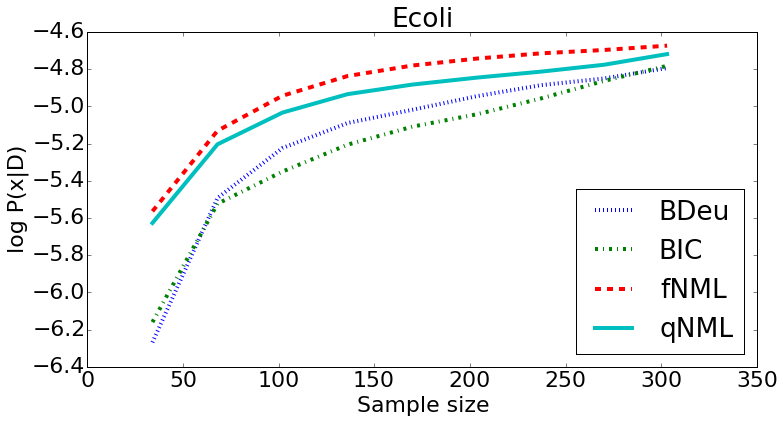

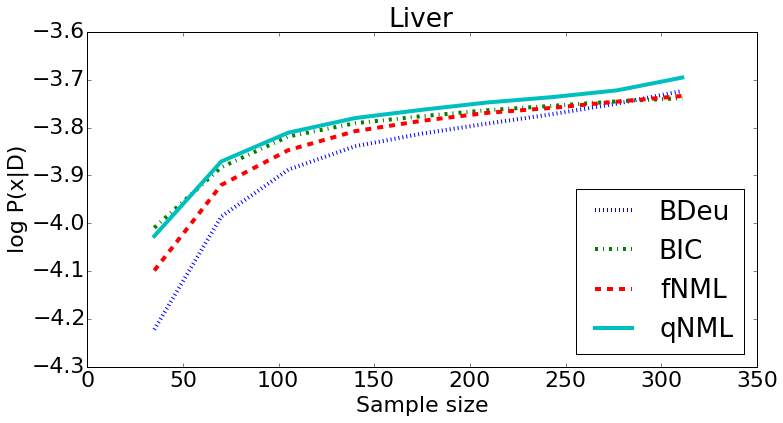

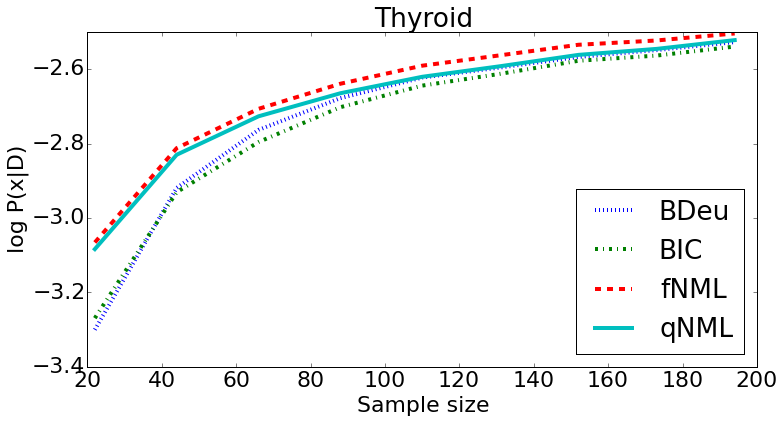

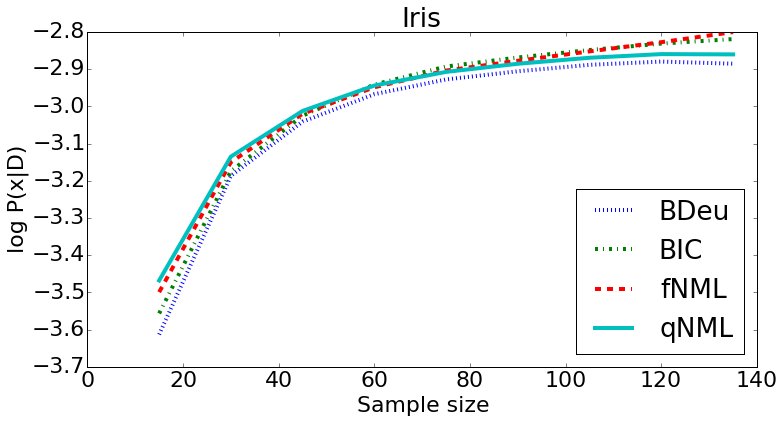

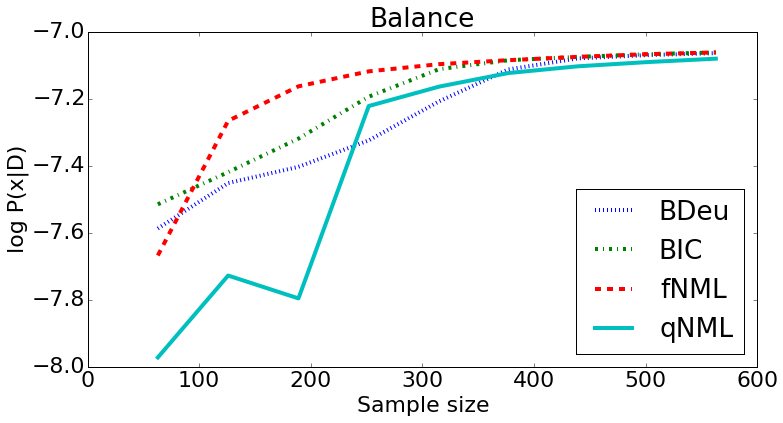

In [22]:
ss_image('log P(x|D)',3,np.mean,'mean')

## Variance of predictions too

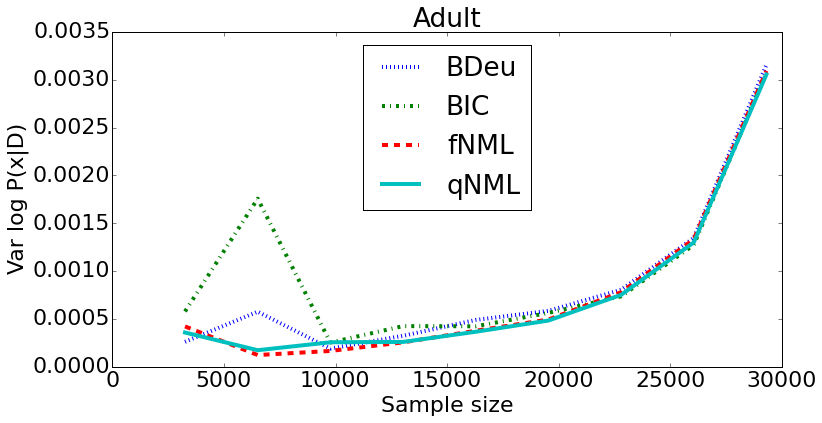

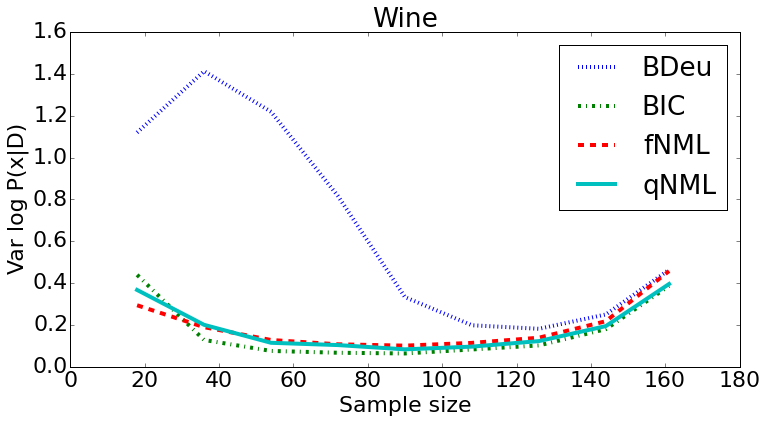

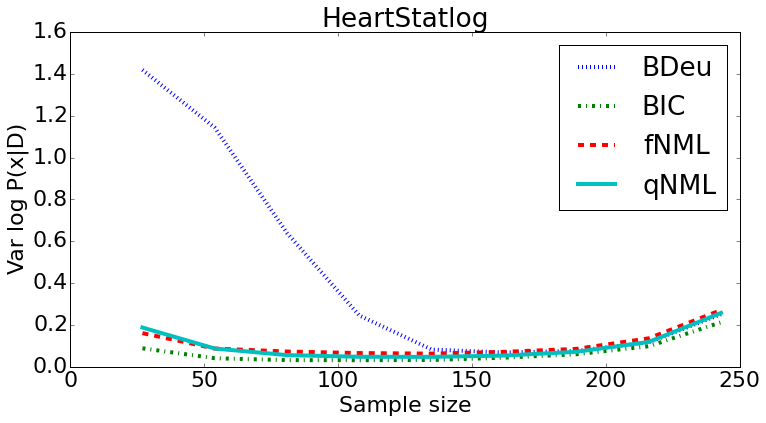

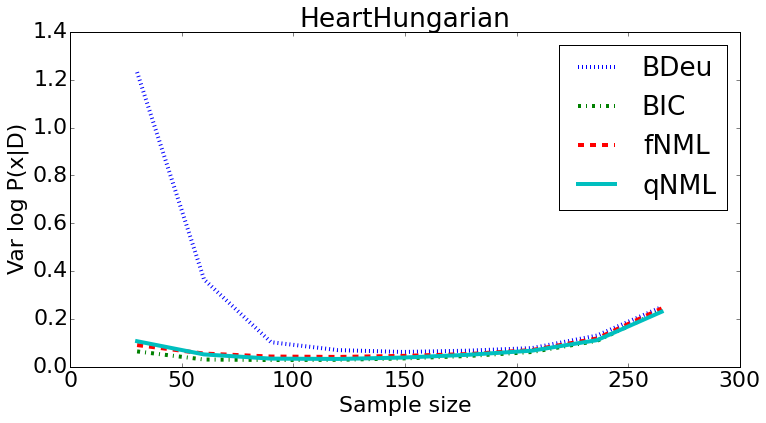

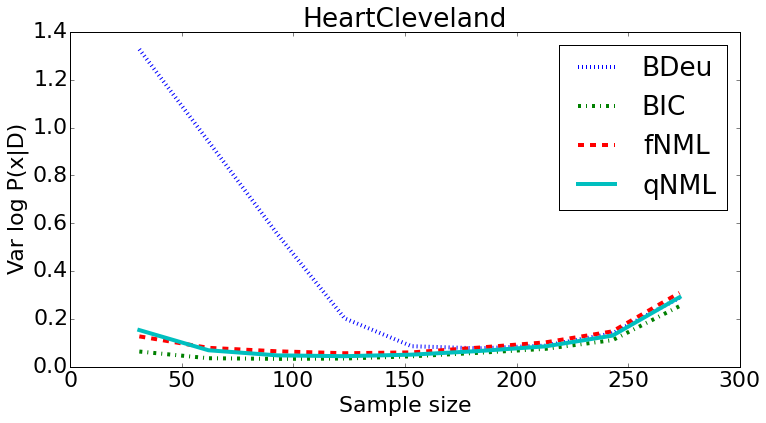

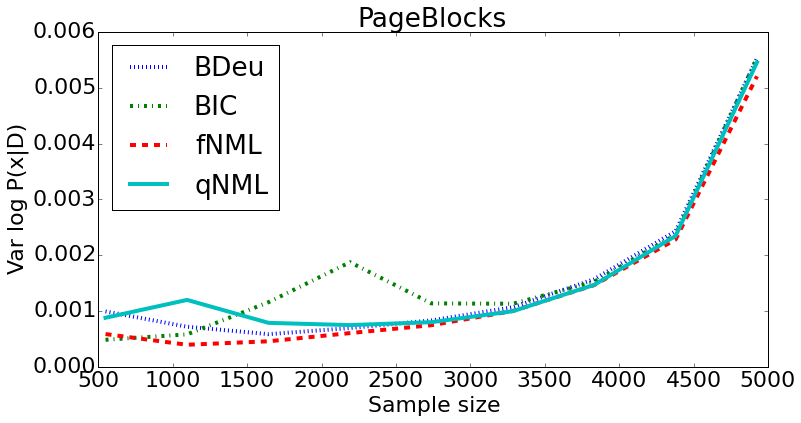

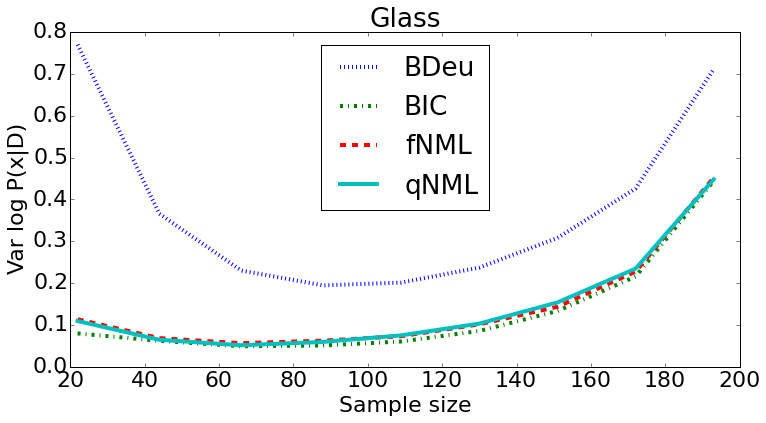

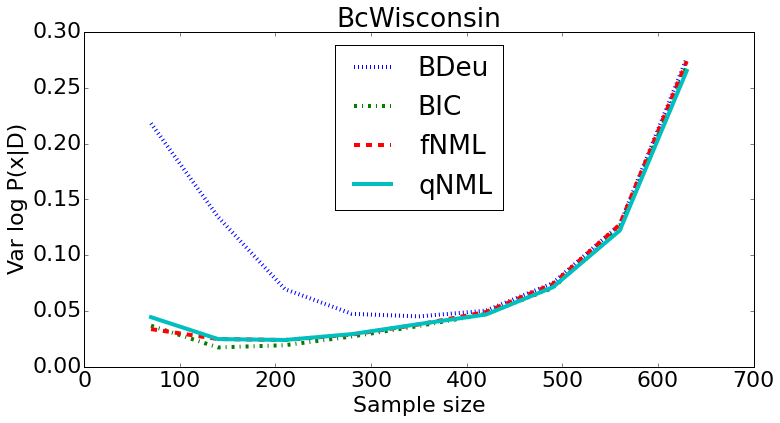

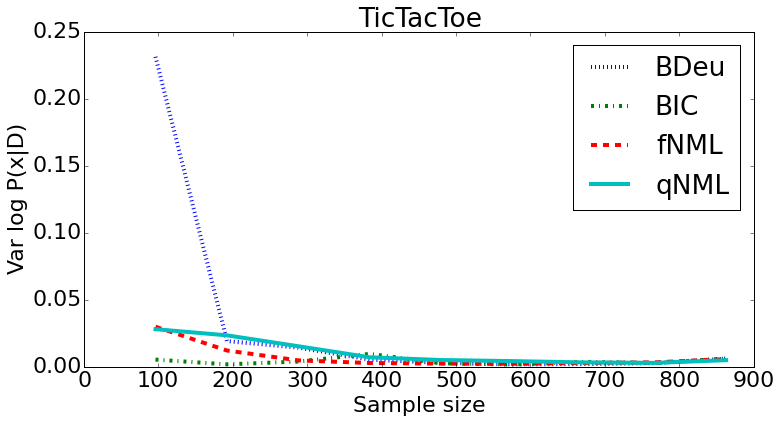

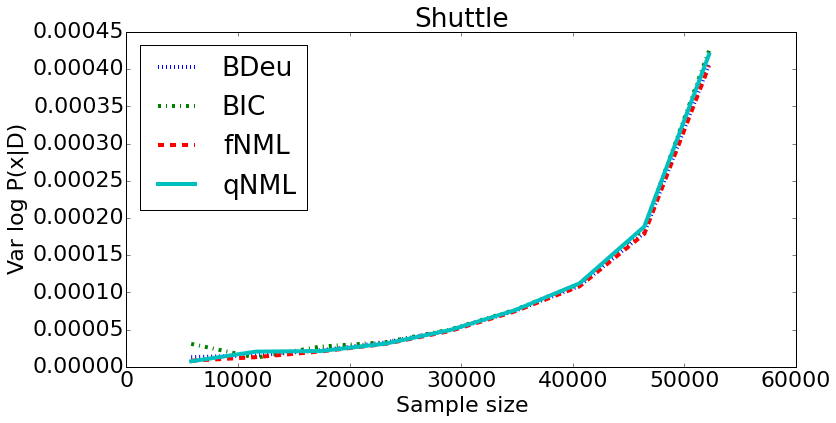

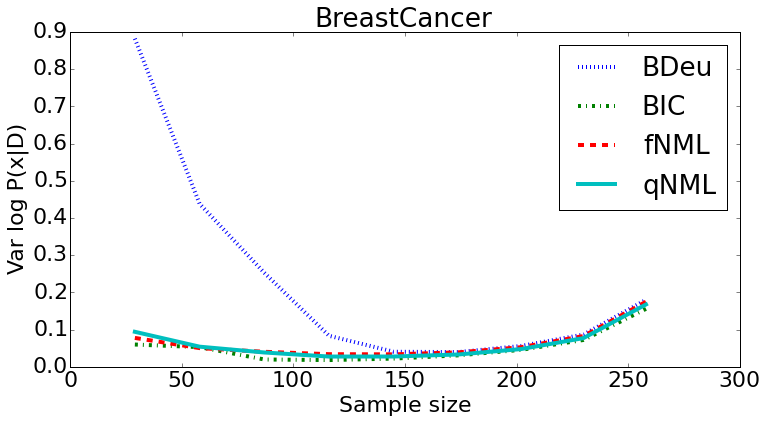

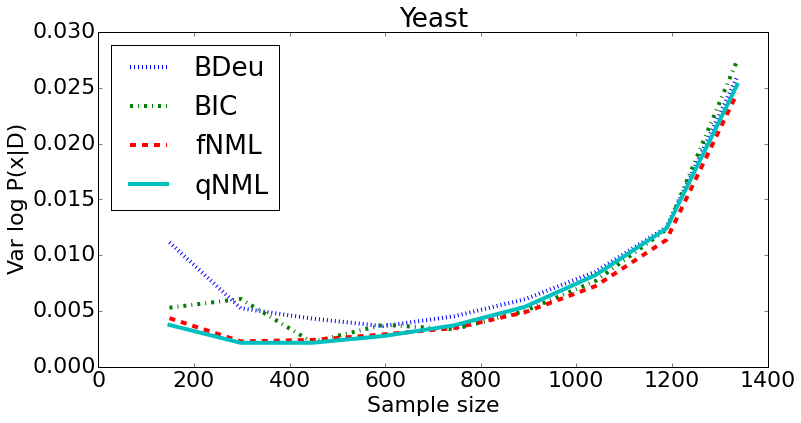

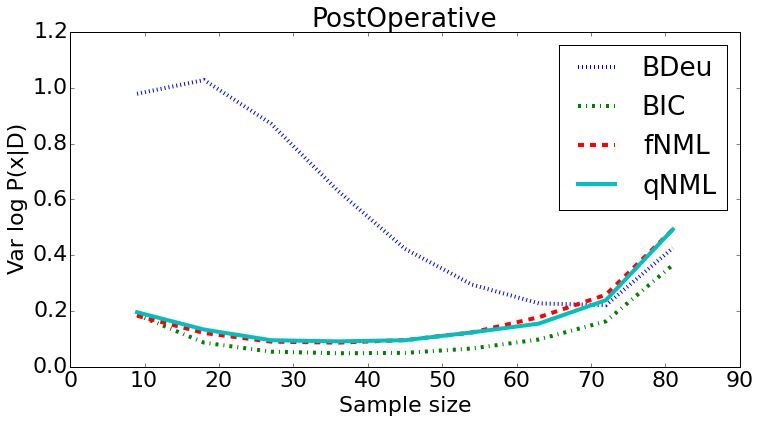

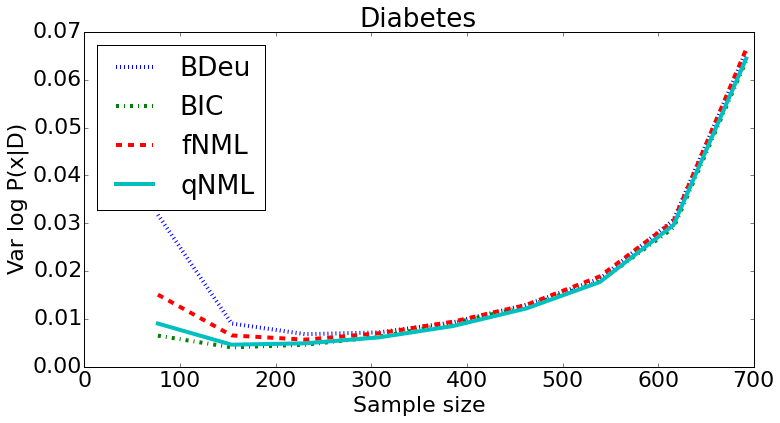

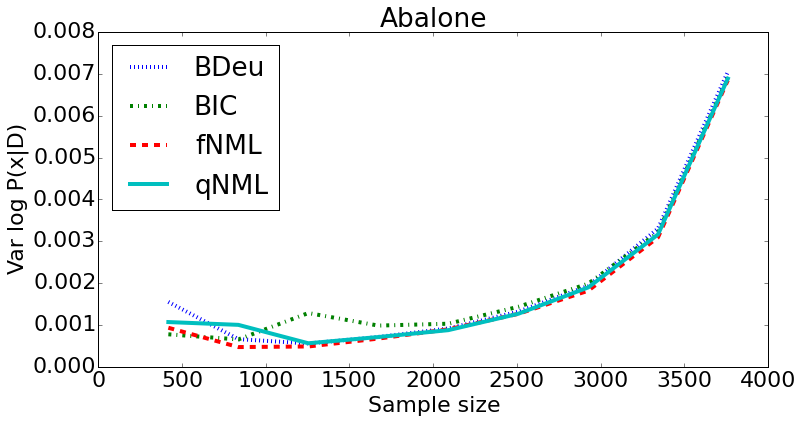

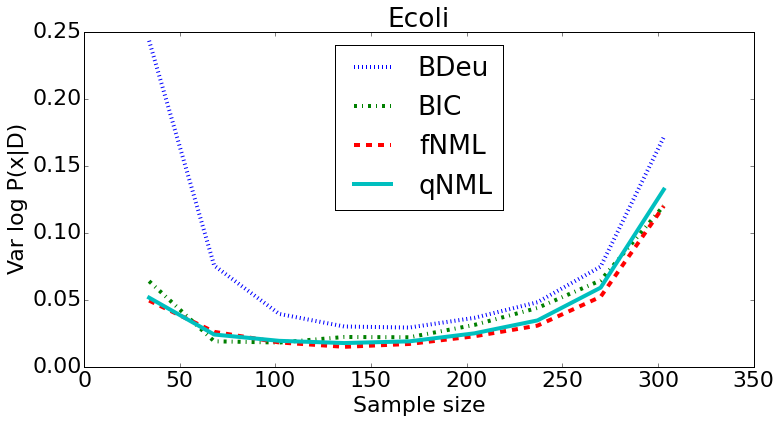

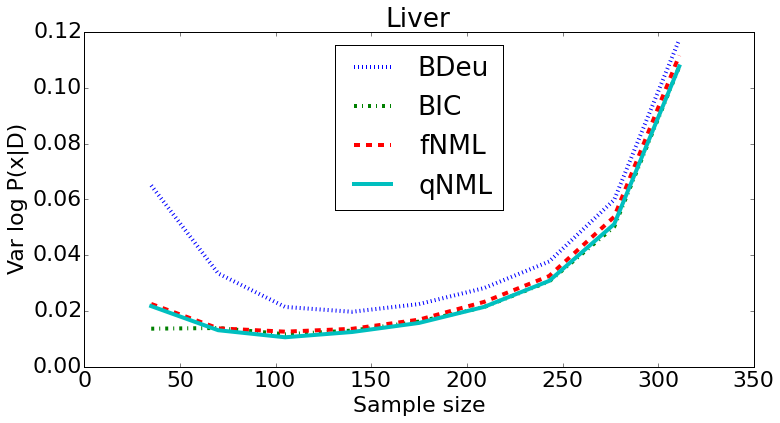

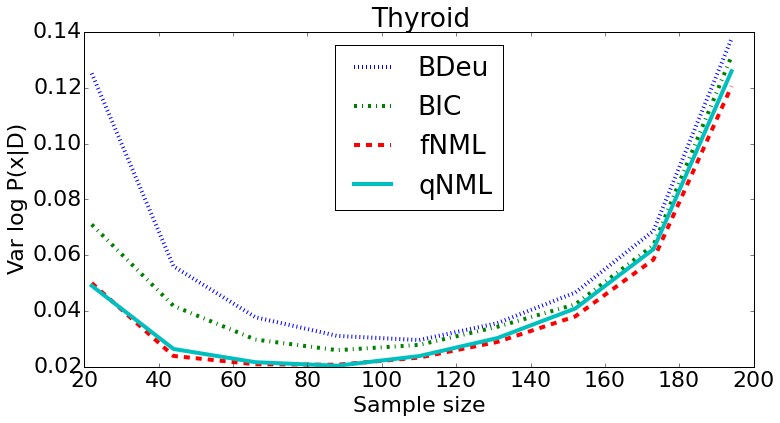

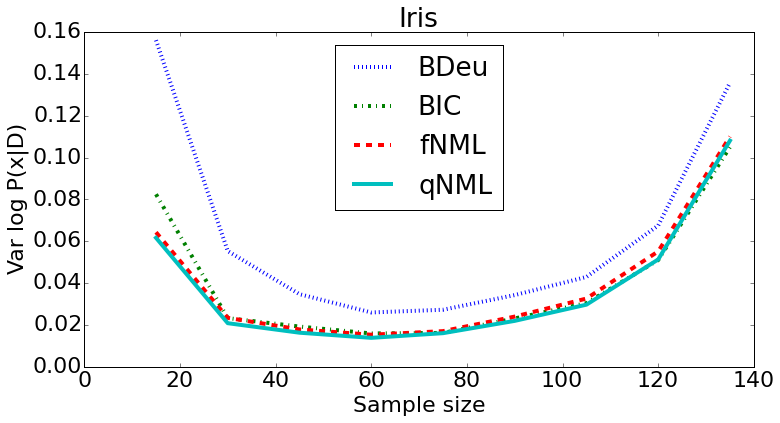

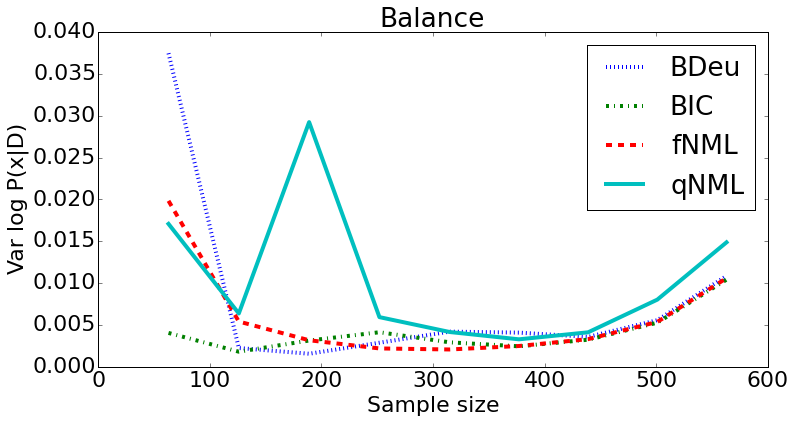

In [23]:
ss_image('Var log P(x|D)',3,np.var,'var')

### Number of parameters

/opt/STools/python/2.7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


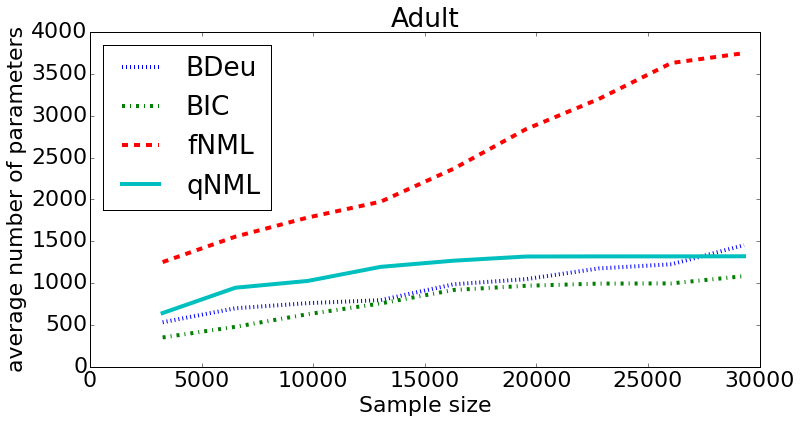

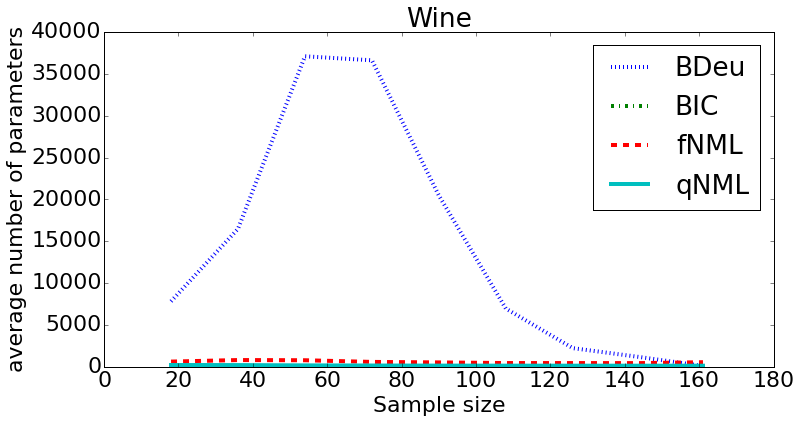

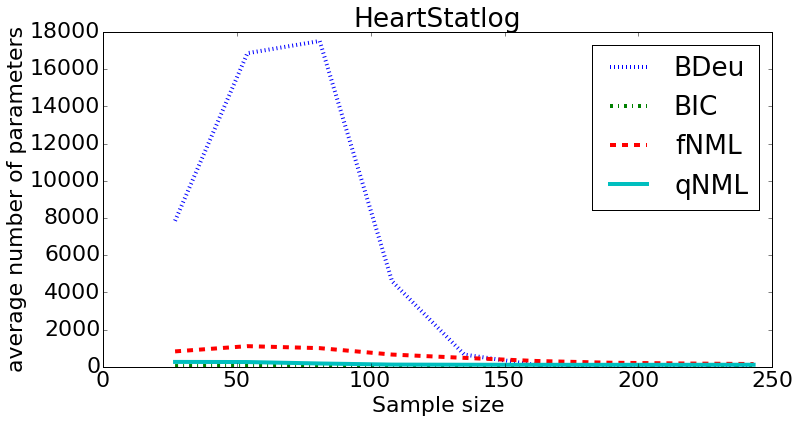

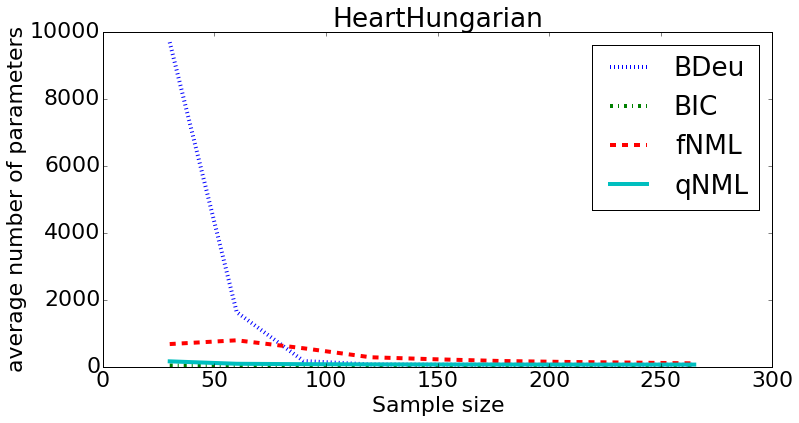

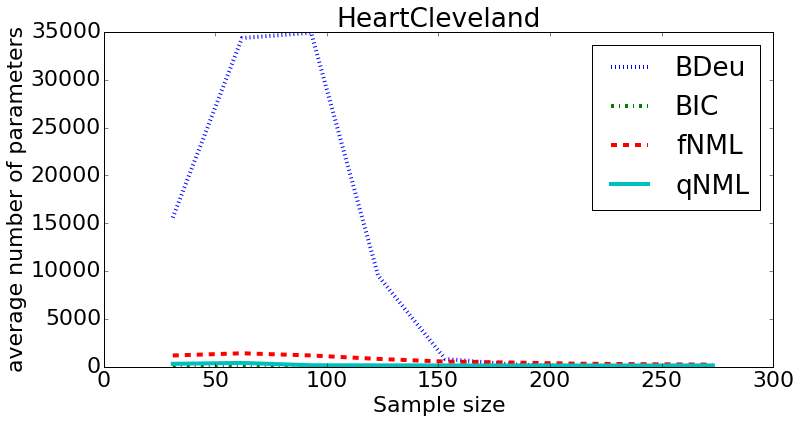

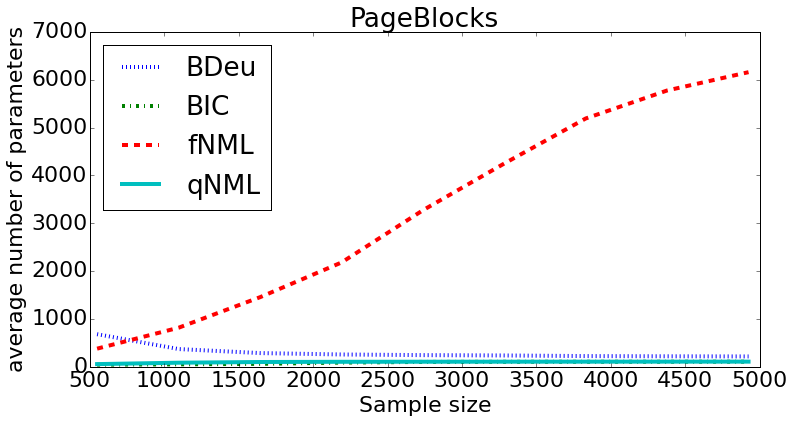

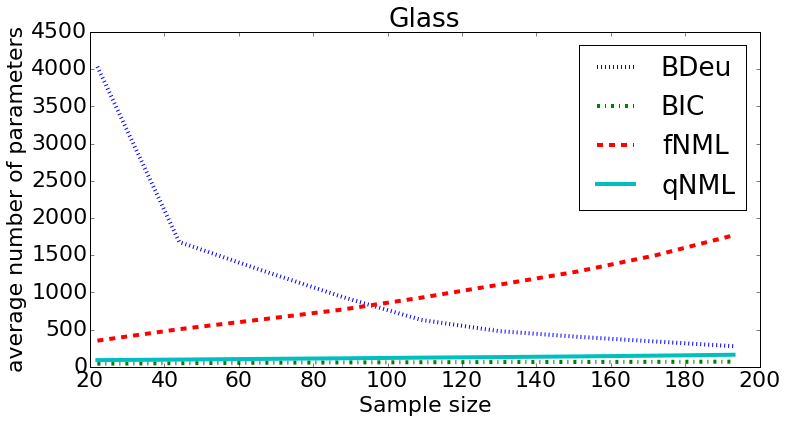

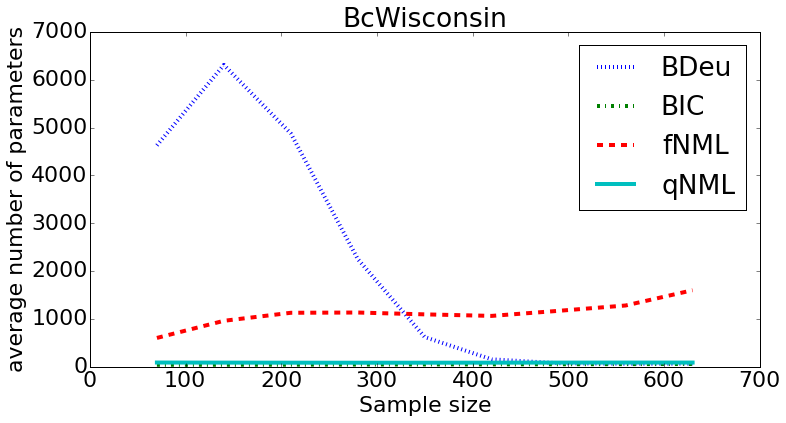

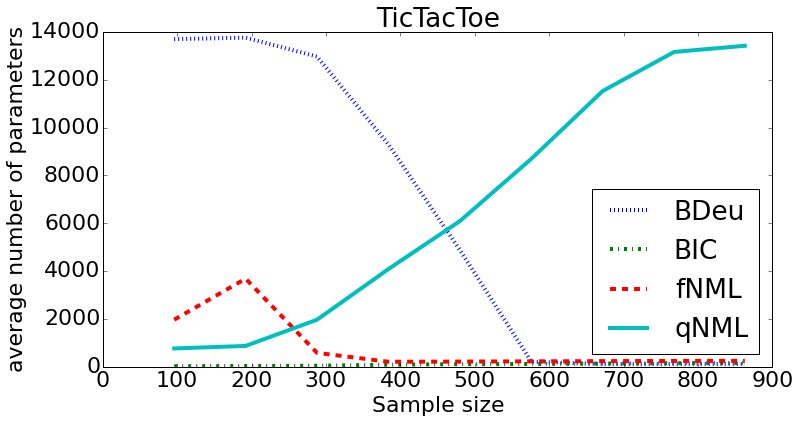

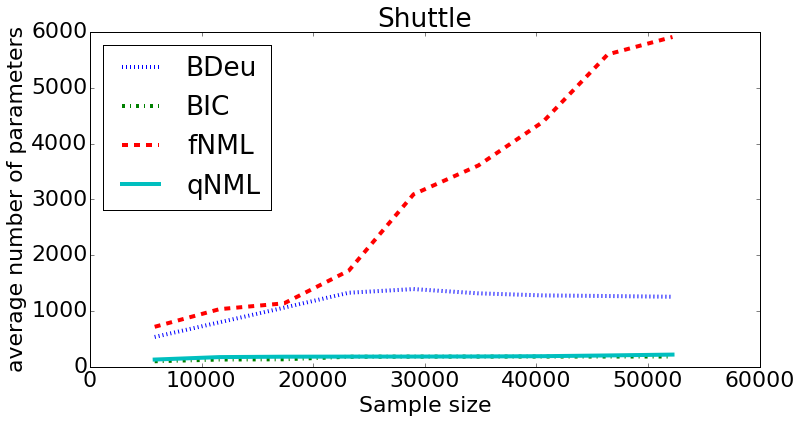

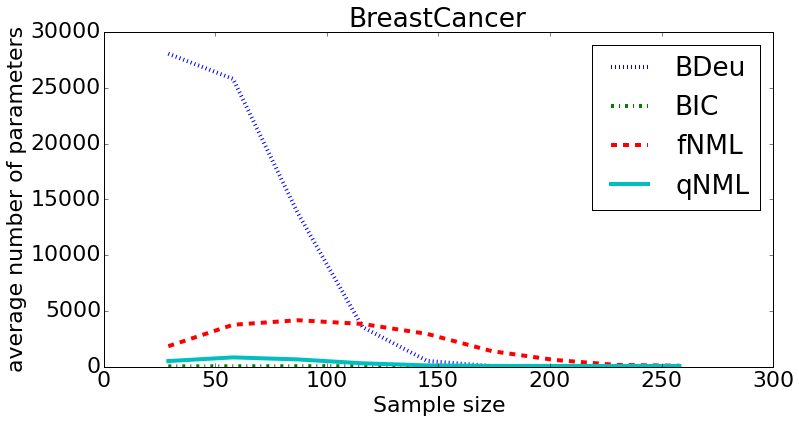

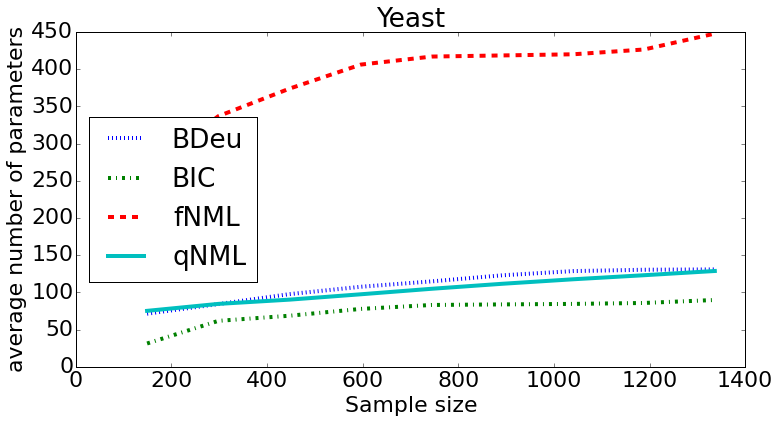

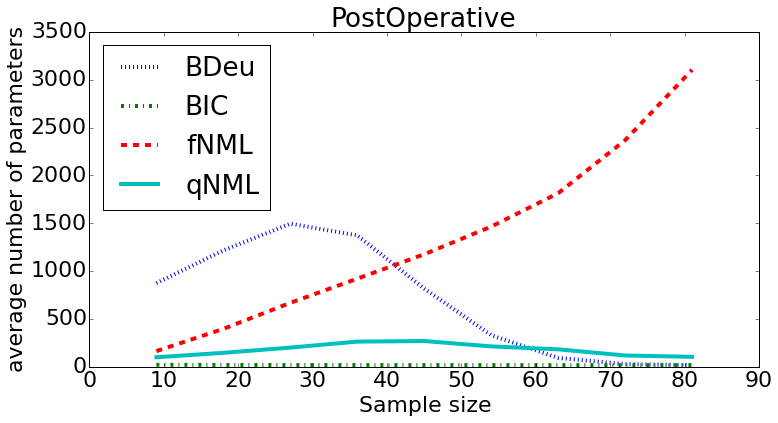

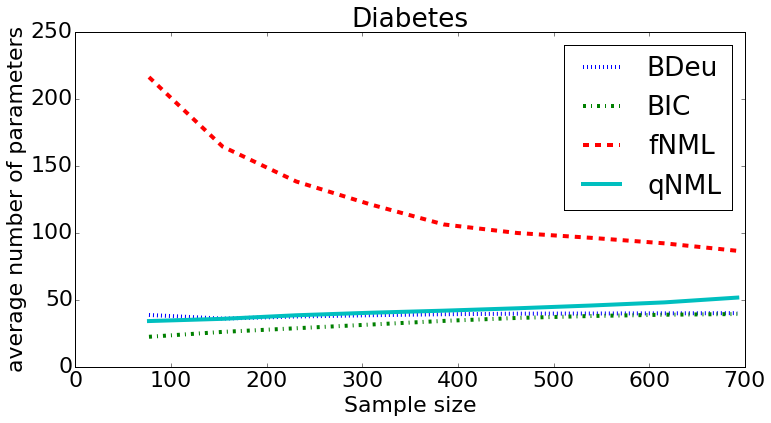

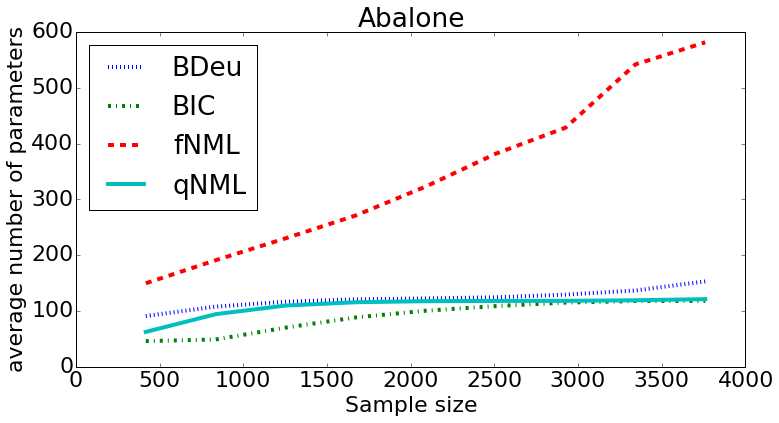

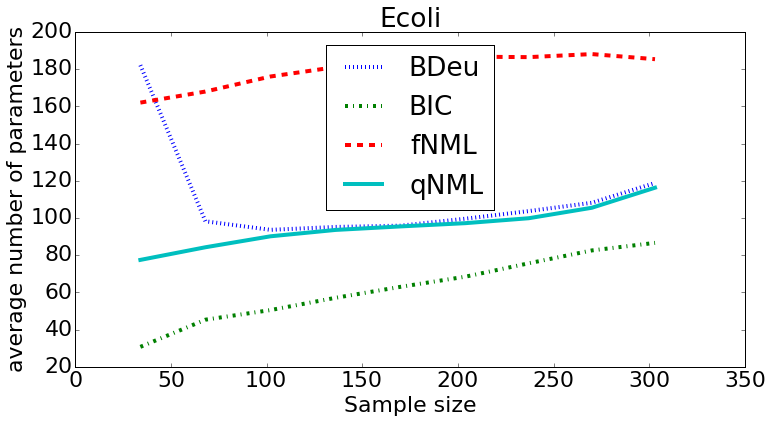

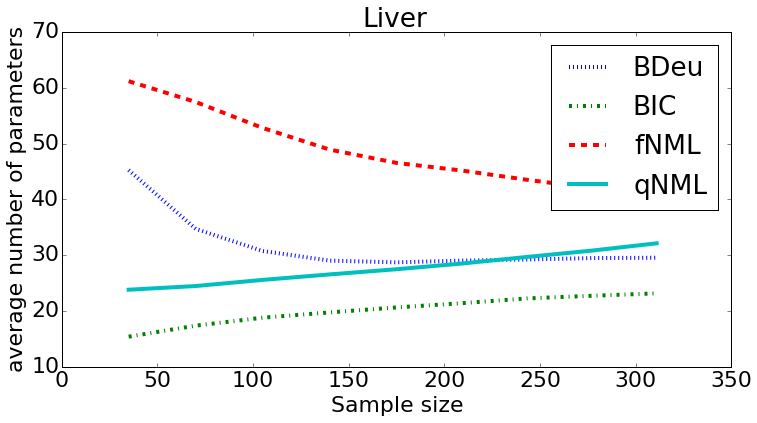

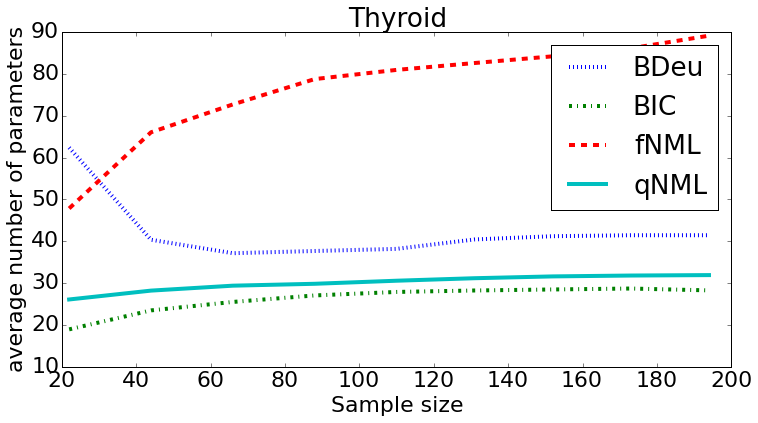

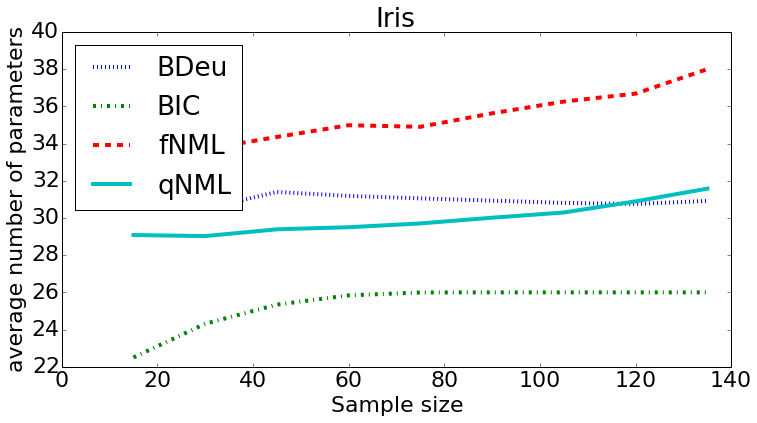

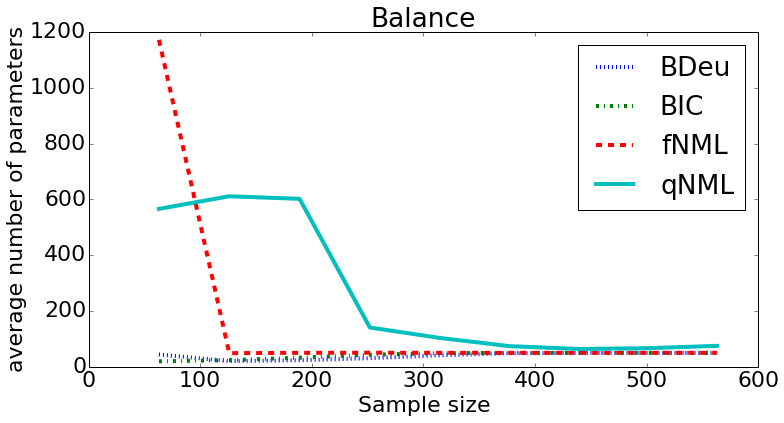

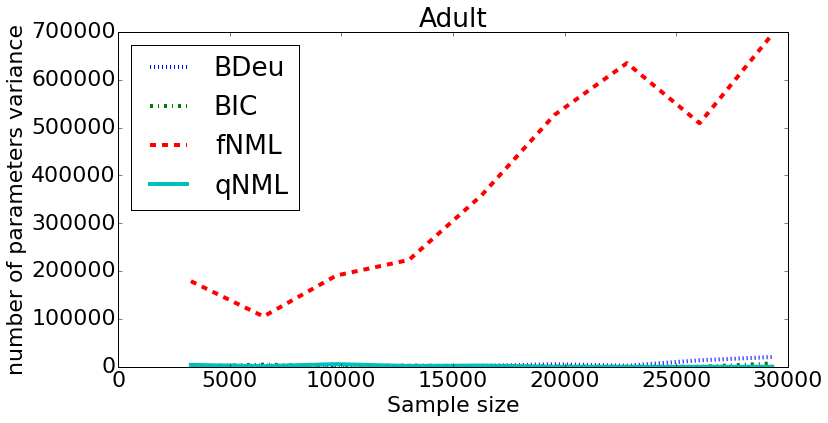

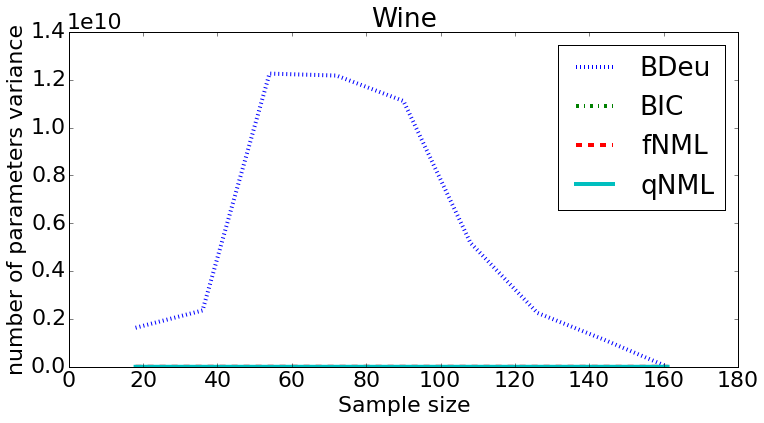

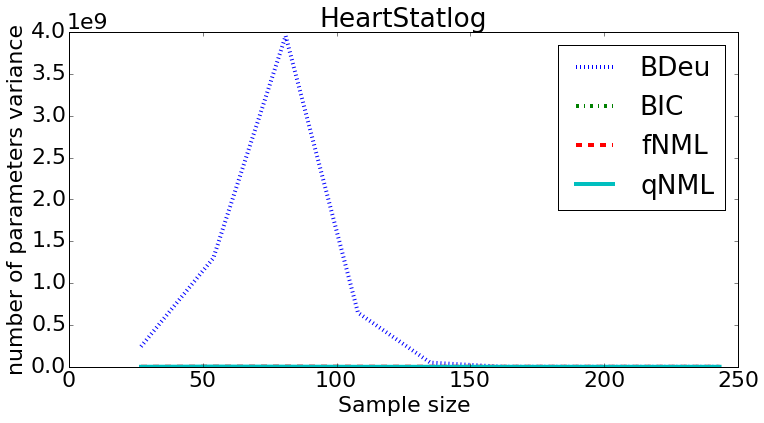

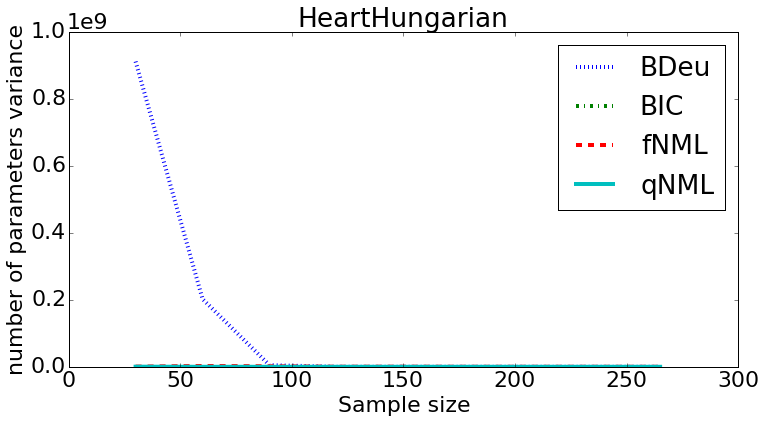

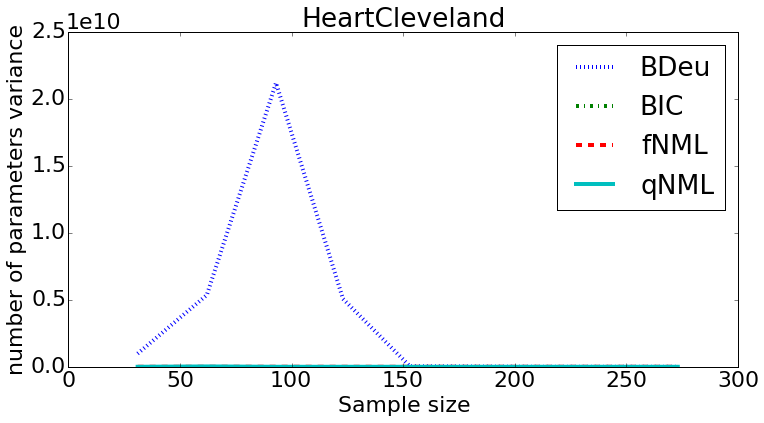

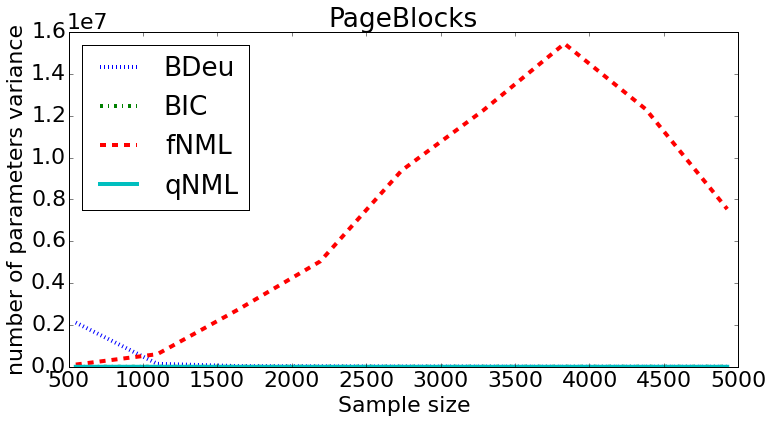

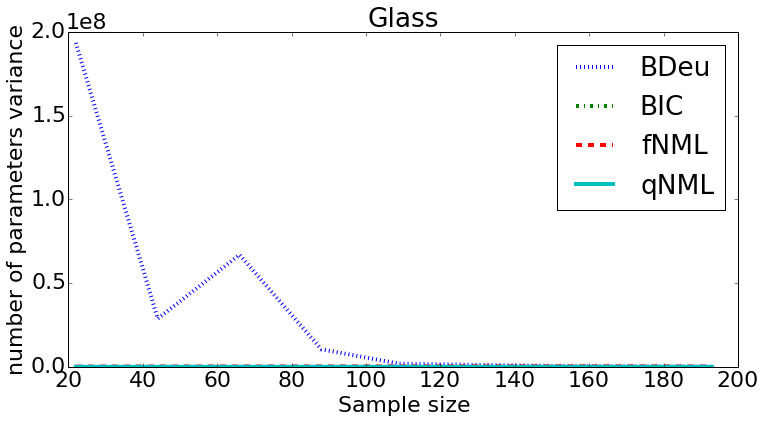

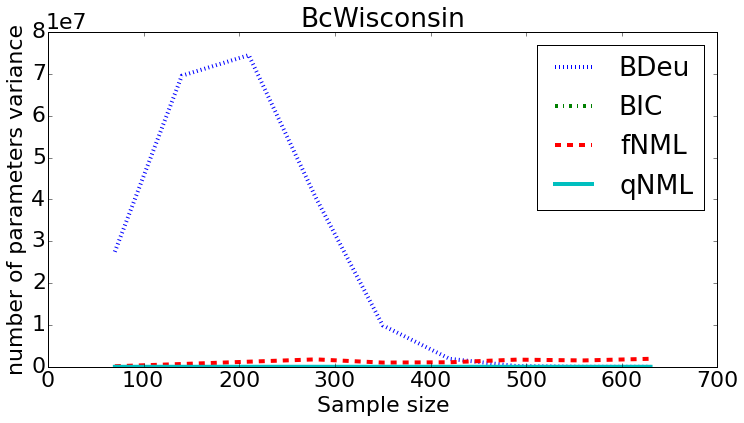

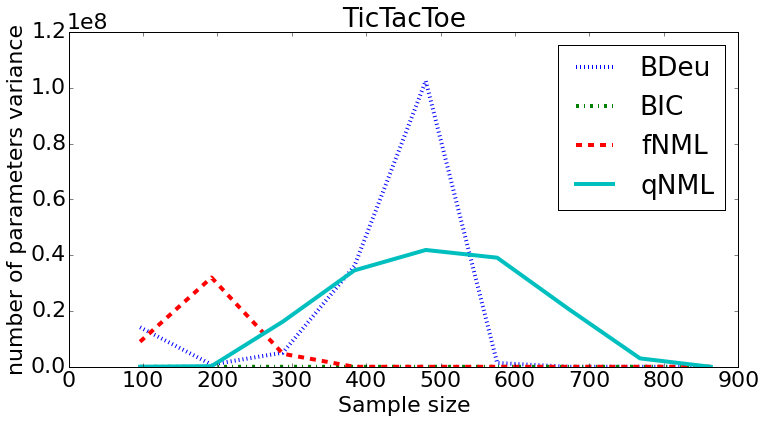

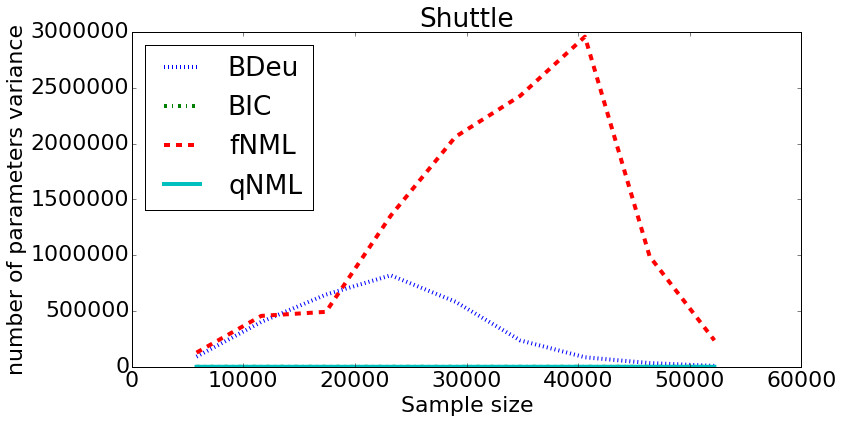

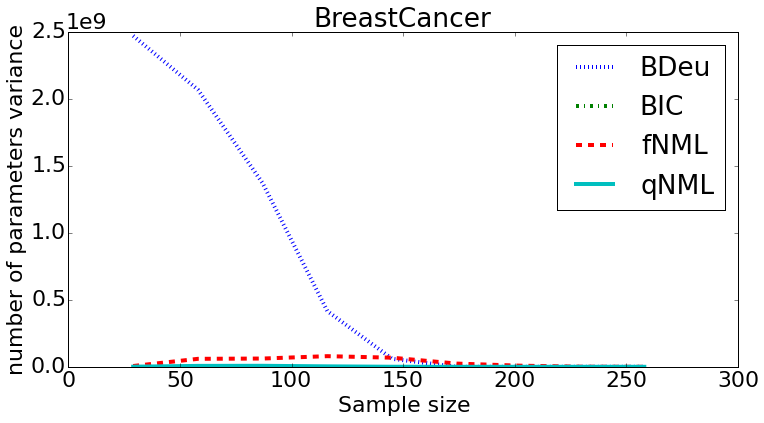

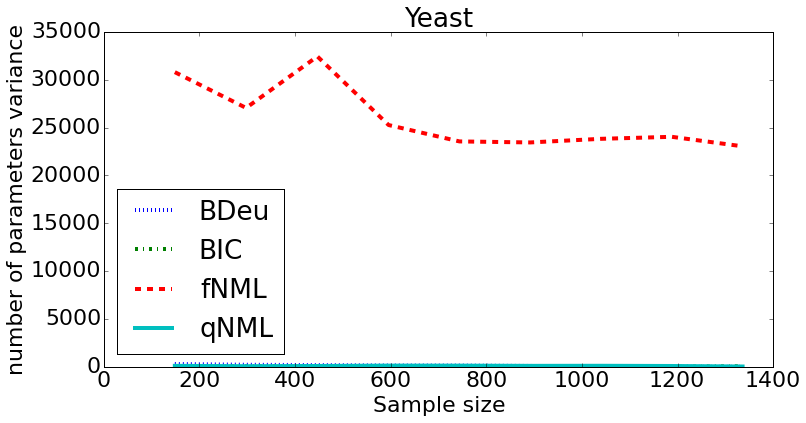

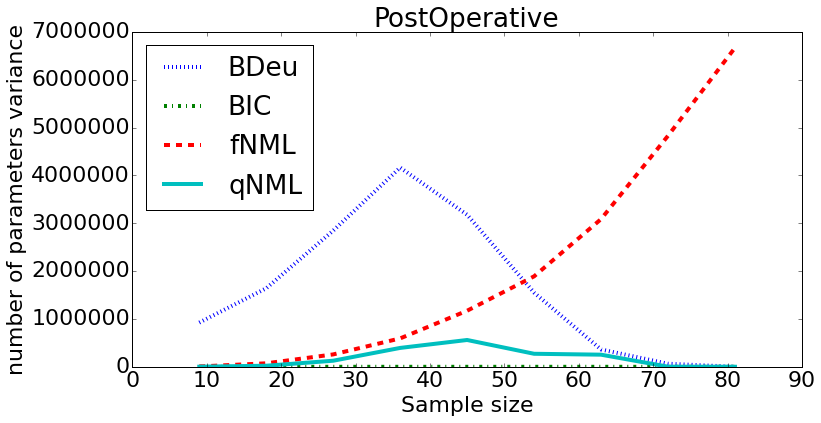

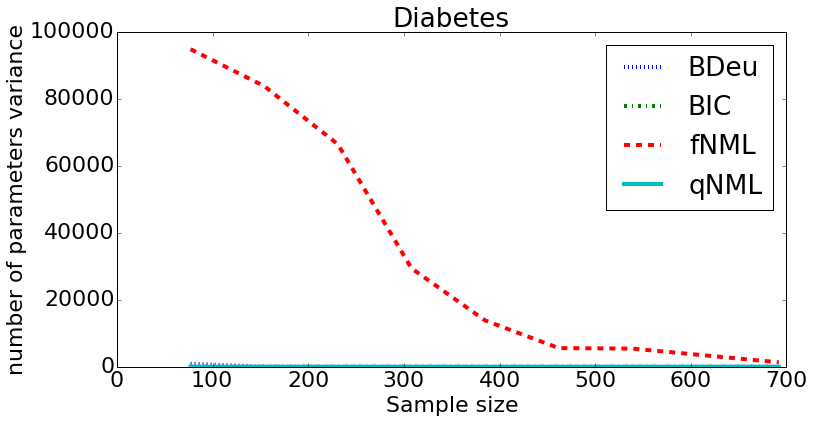

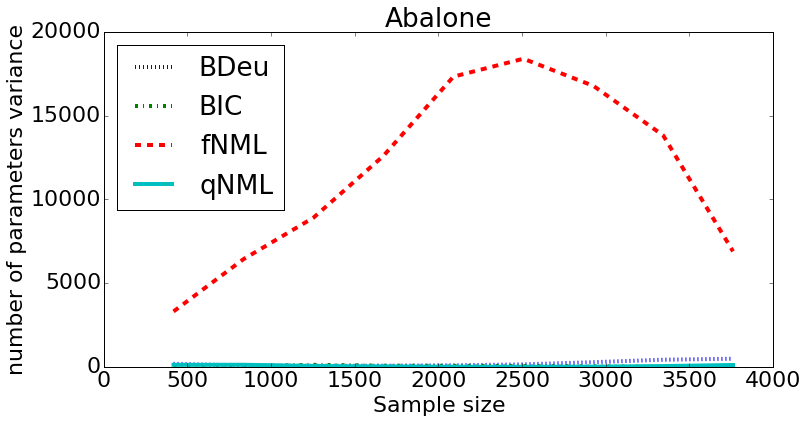

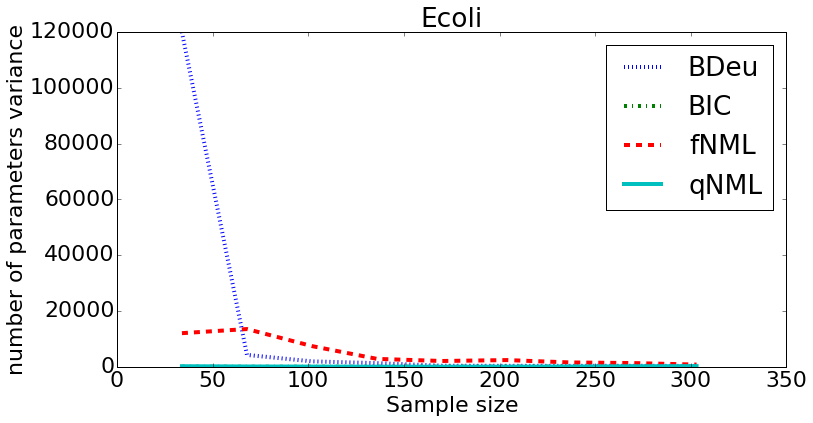

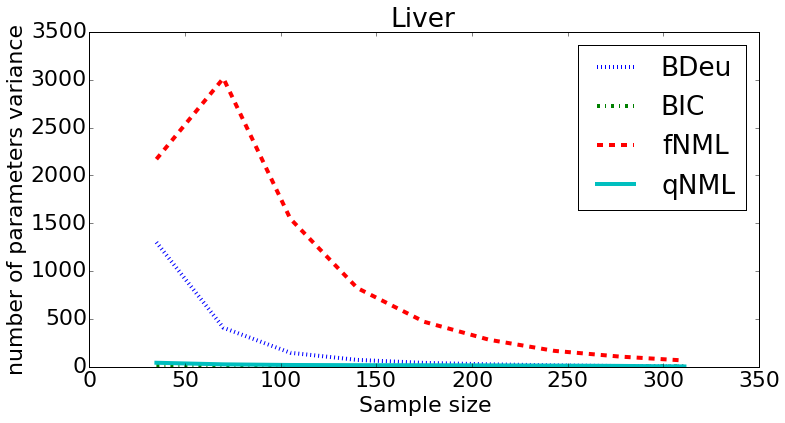

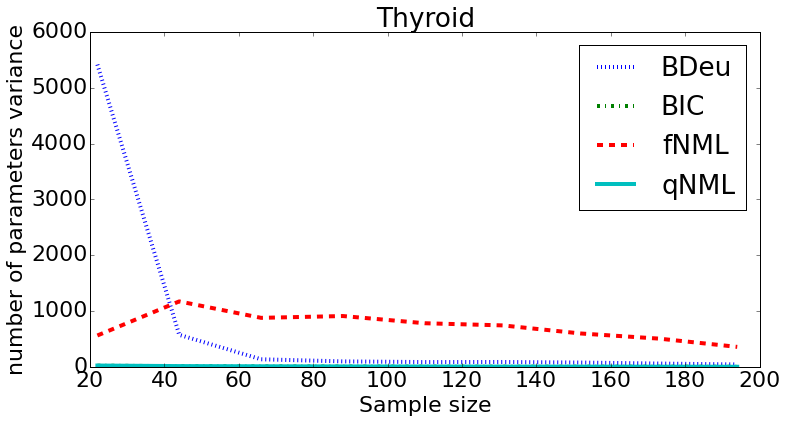

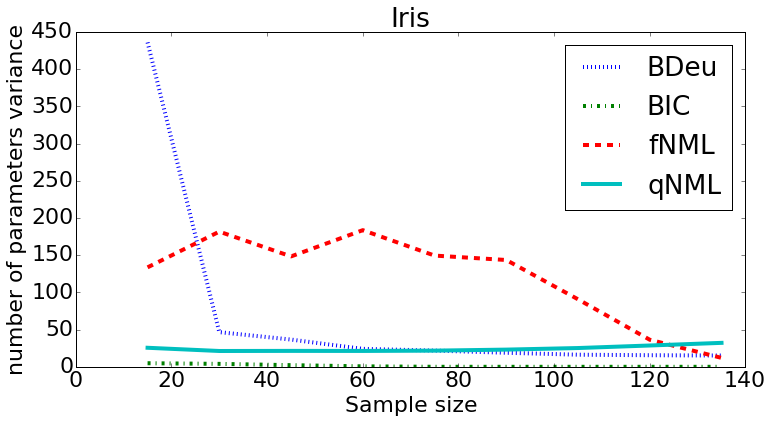

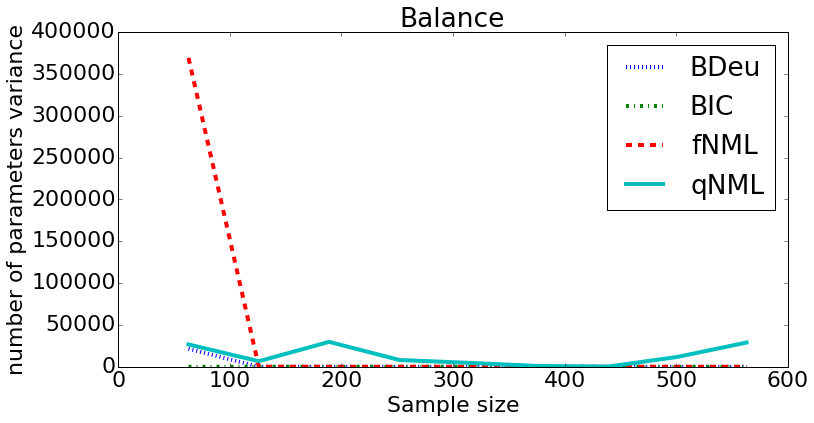

In [24]:
ss_image('average number of parameters',2,np.mean,'mean')
ss_image('number of parameters variance',2,np.var,'var')

### Number of parents

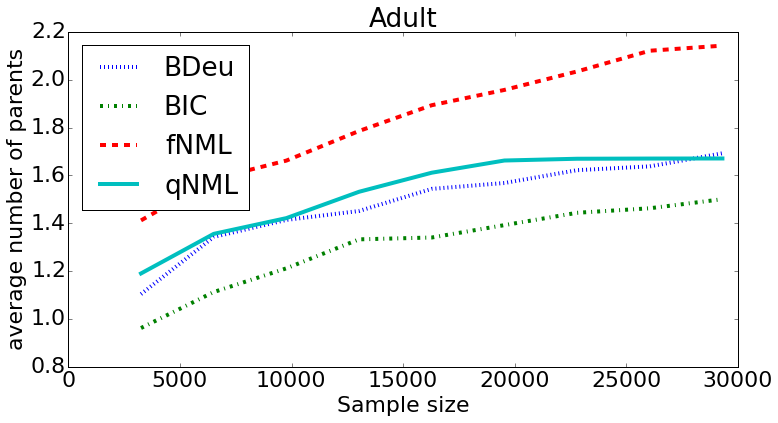

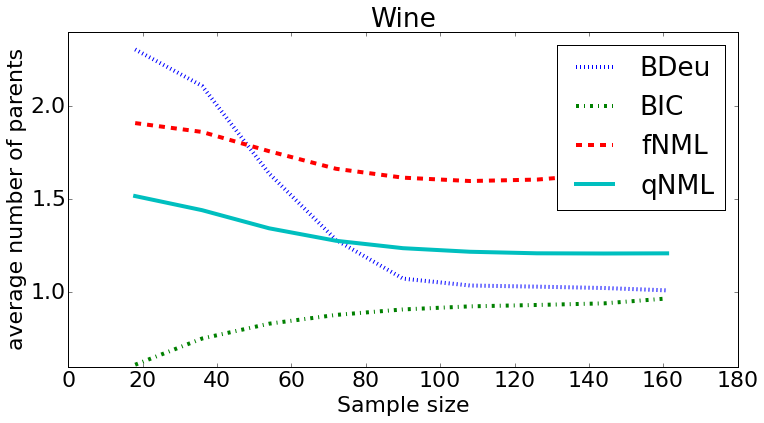

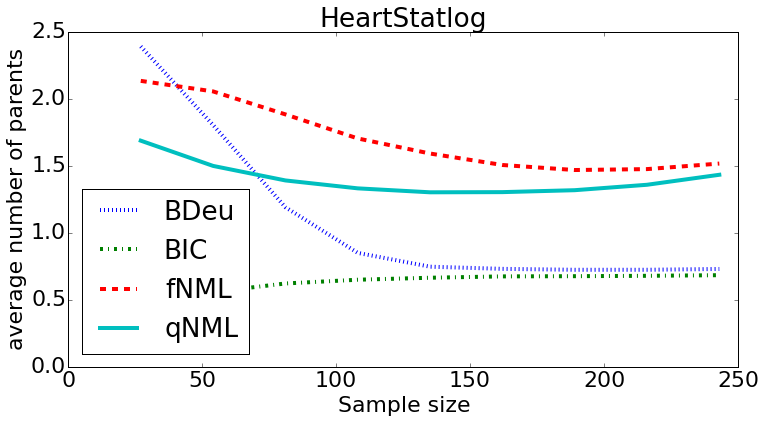

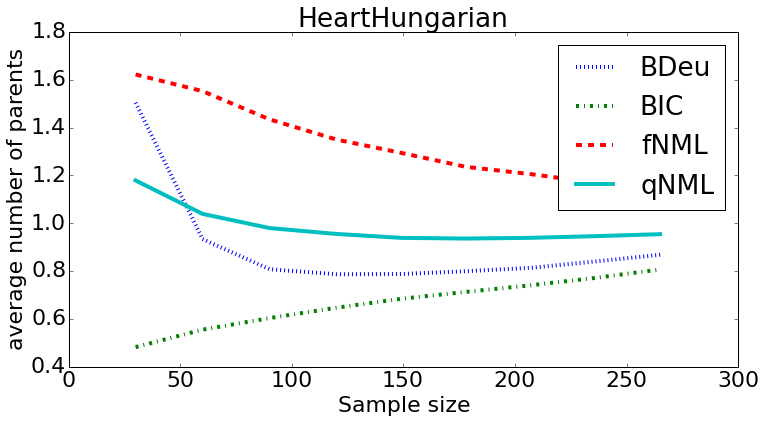

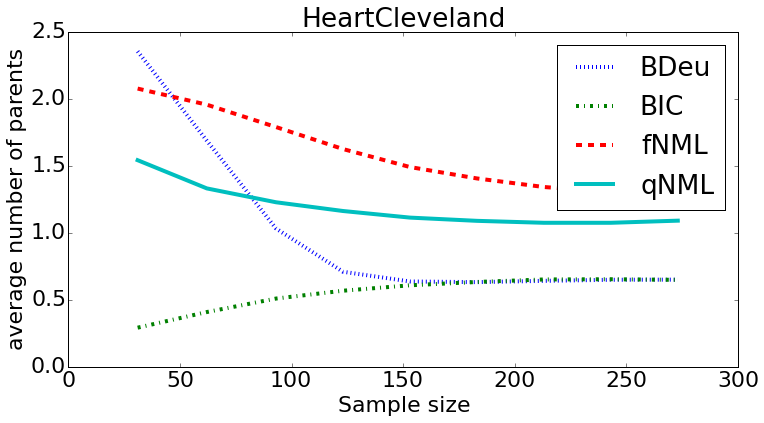

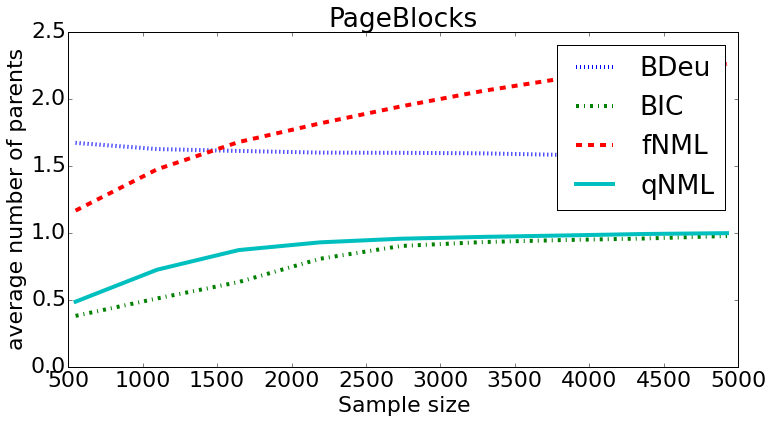

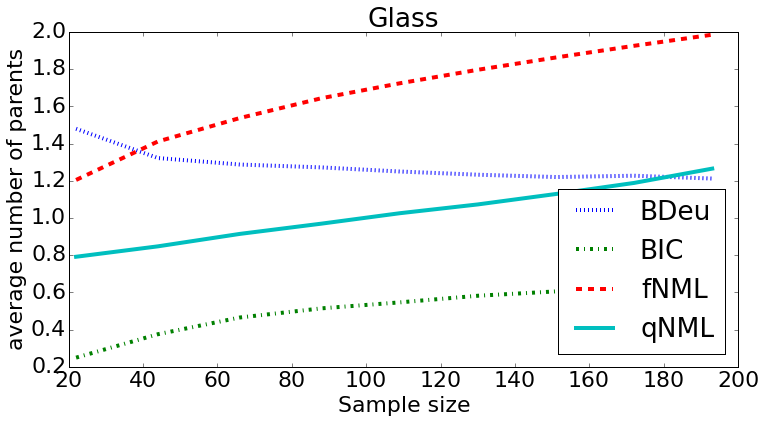

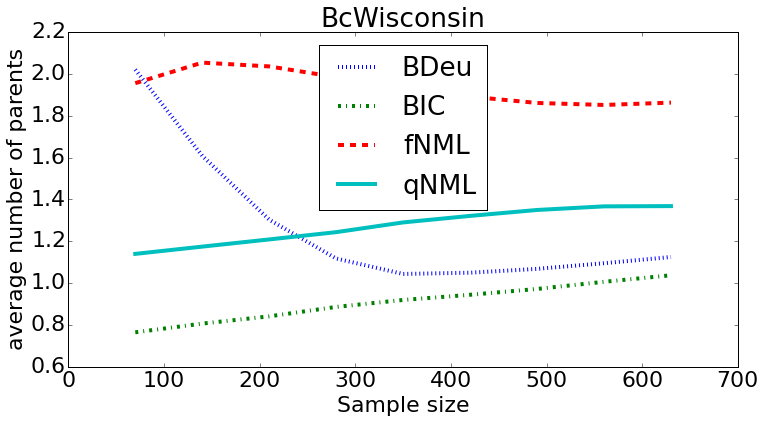

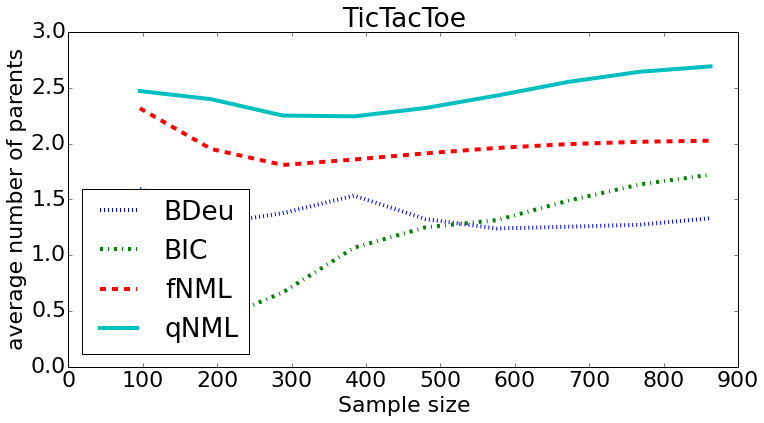

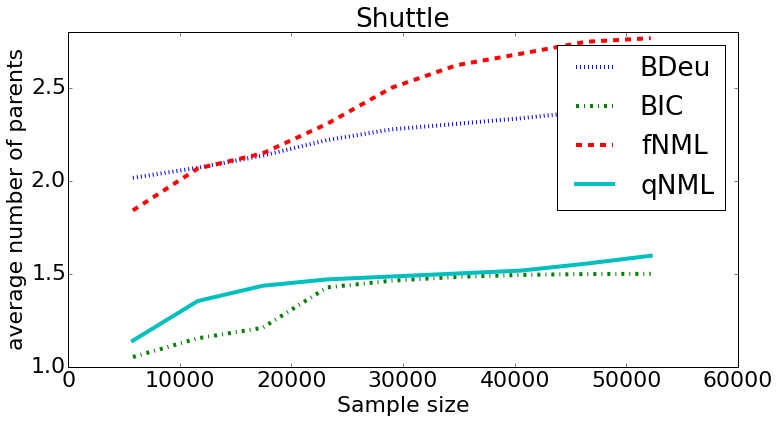

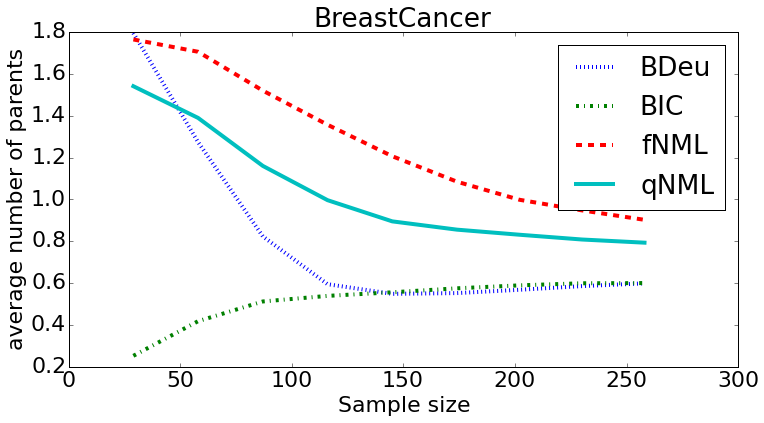

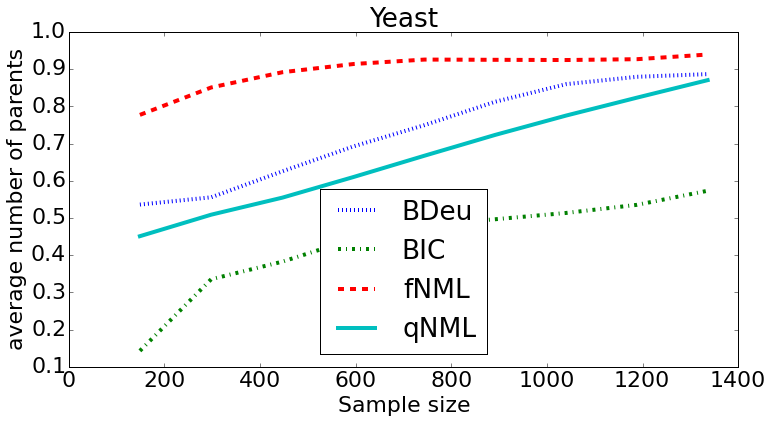

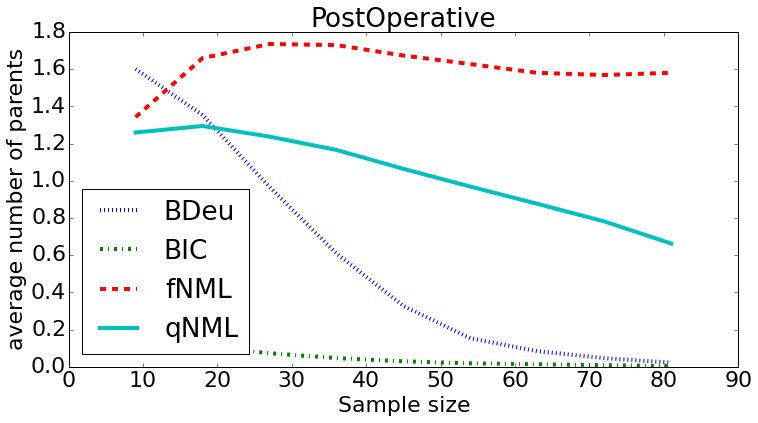

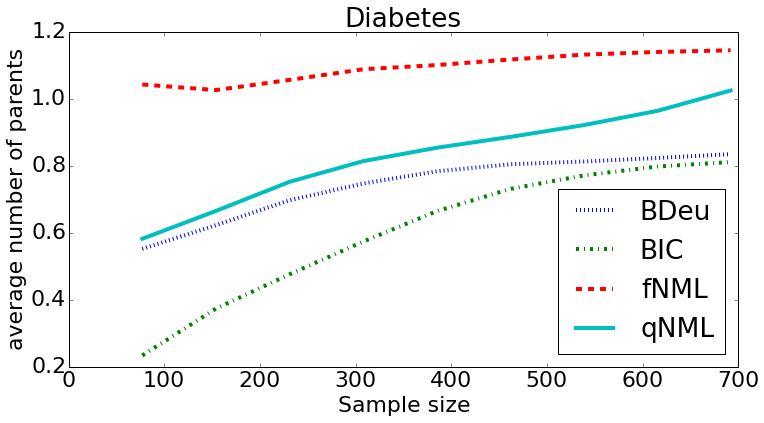

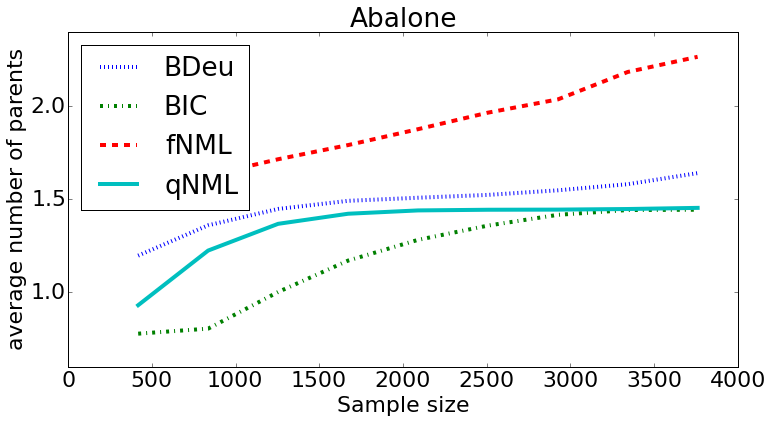

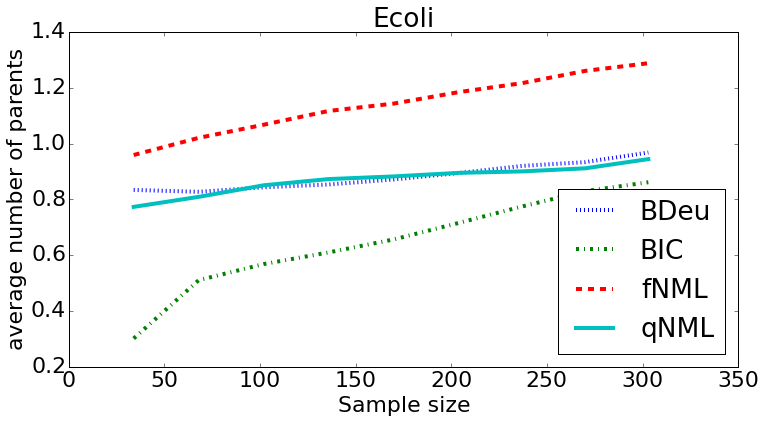

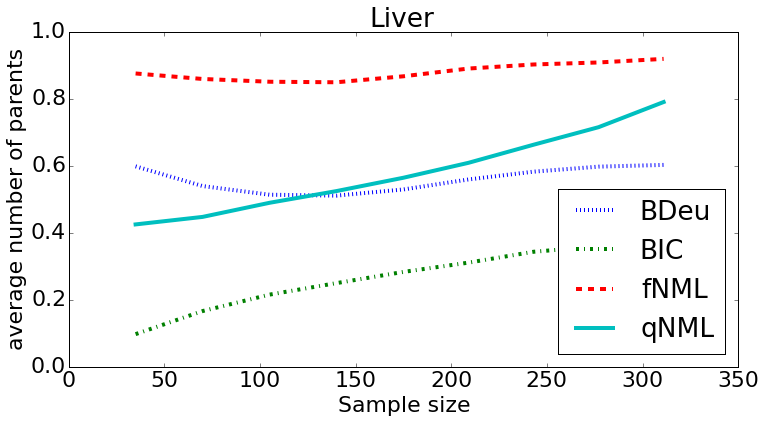

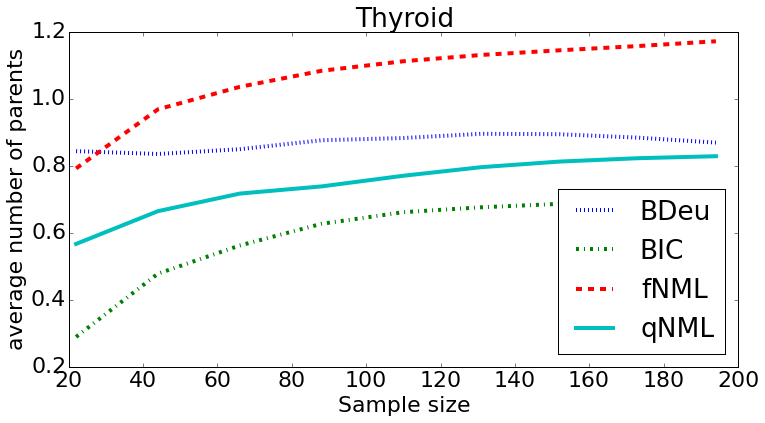

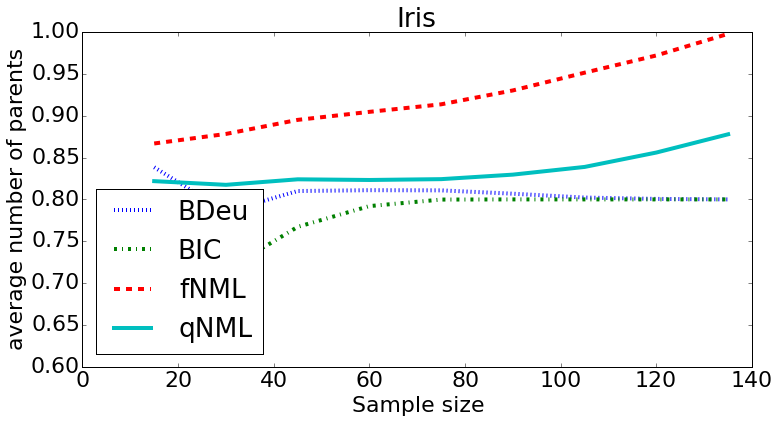

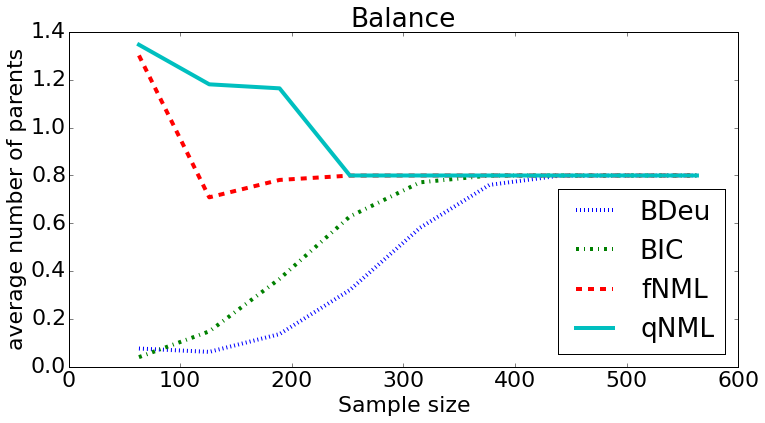

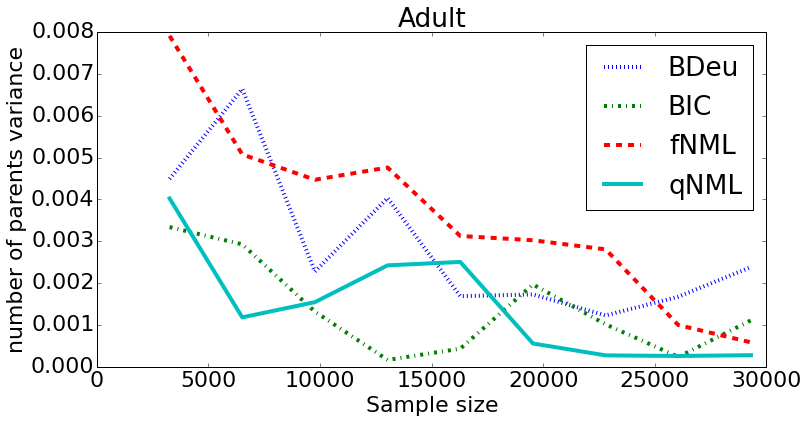

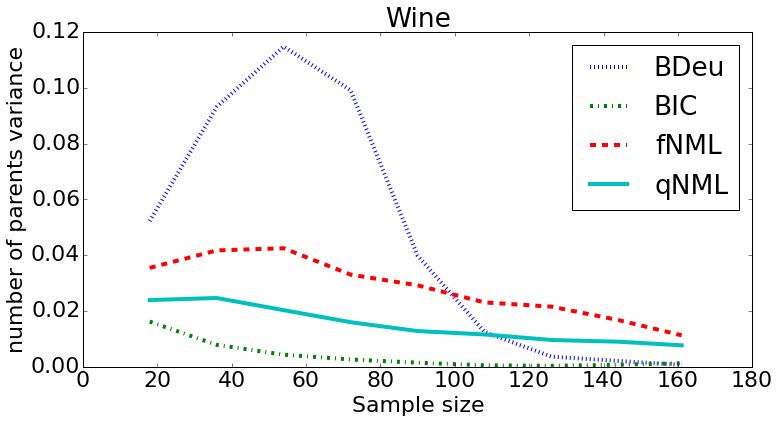

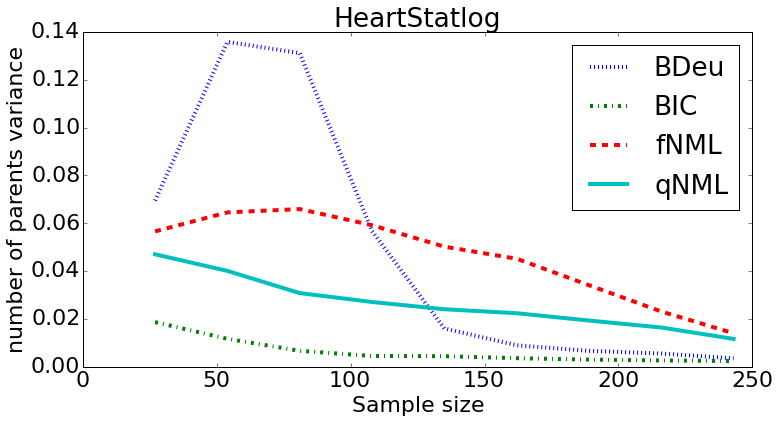

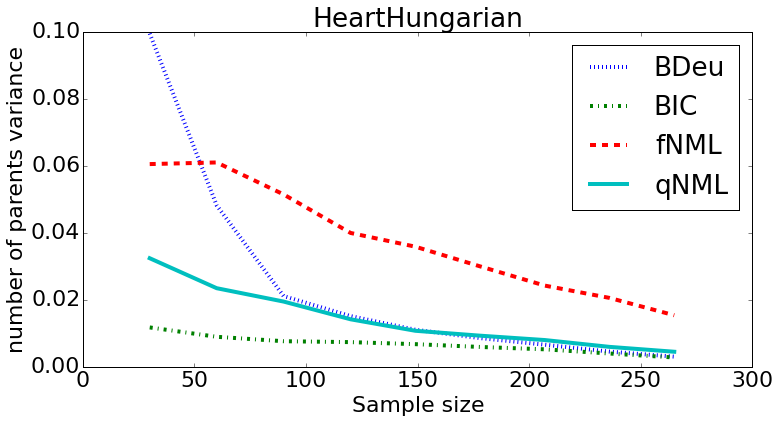

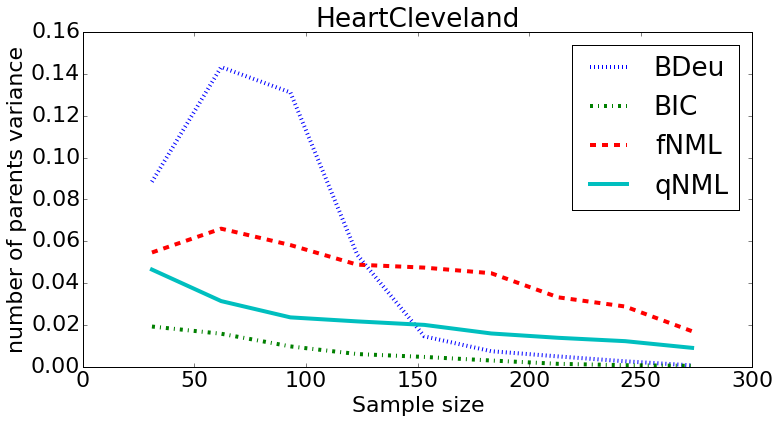

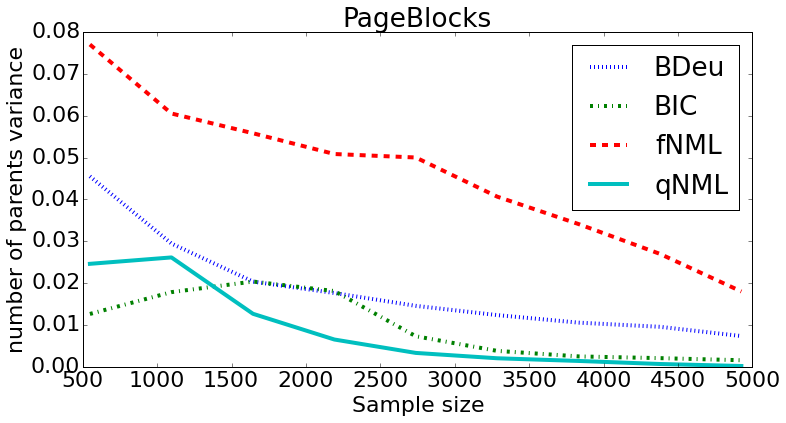

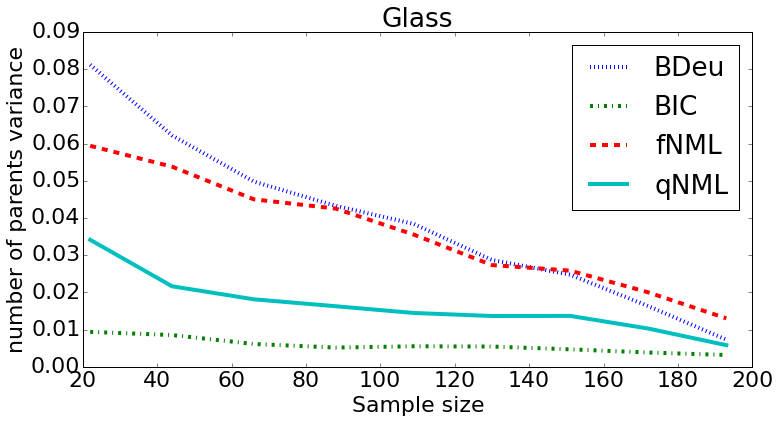

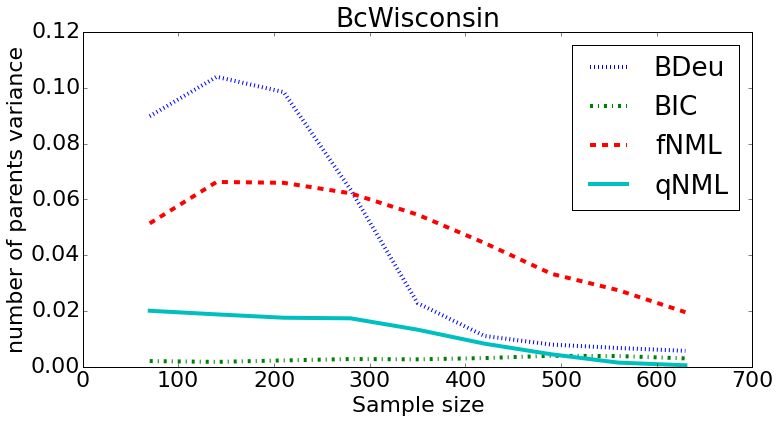

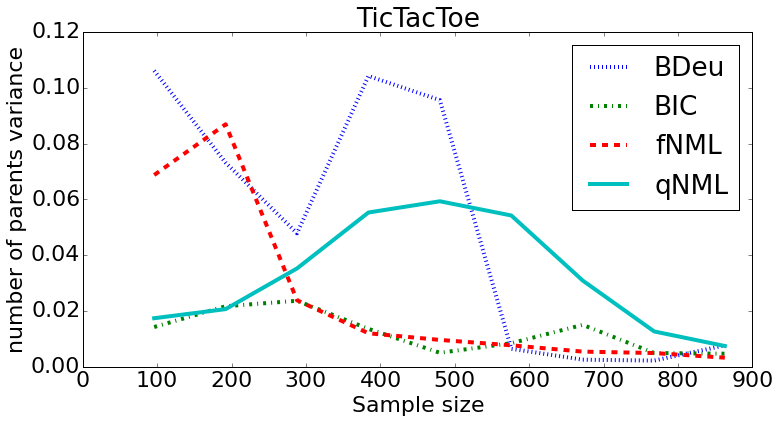

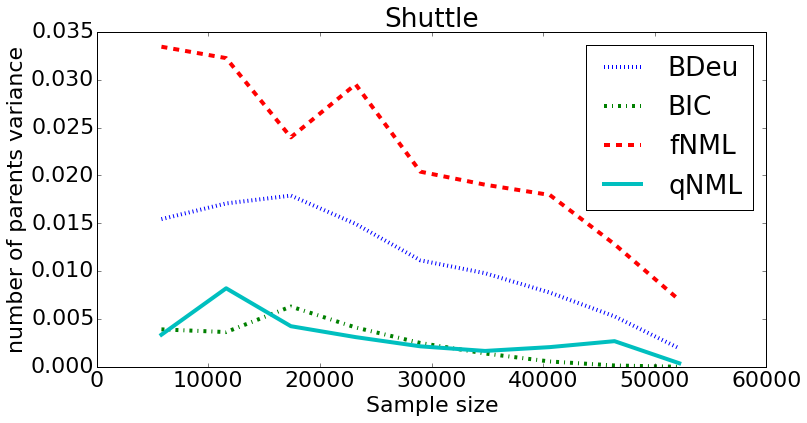

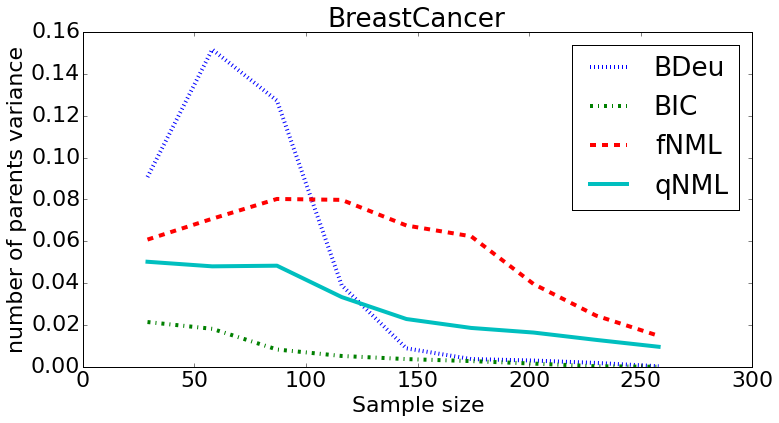

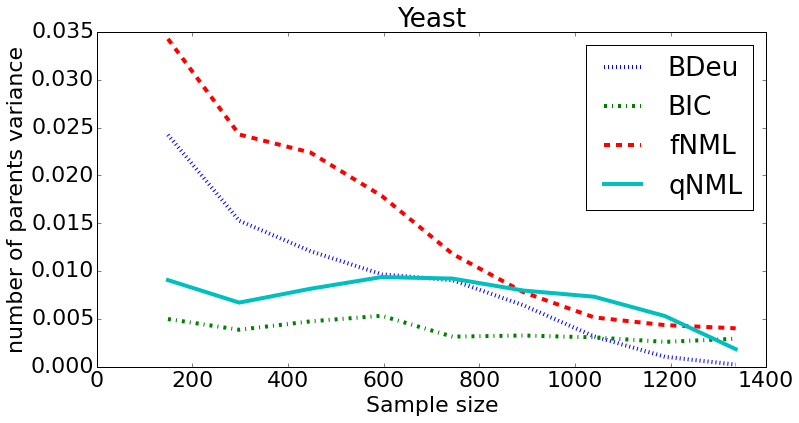

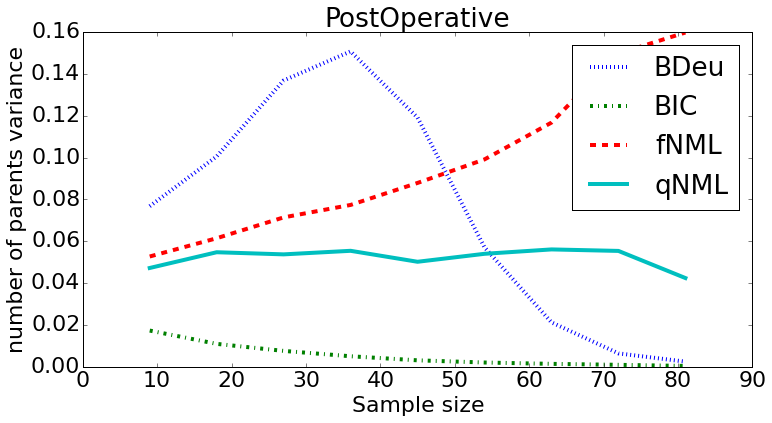

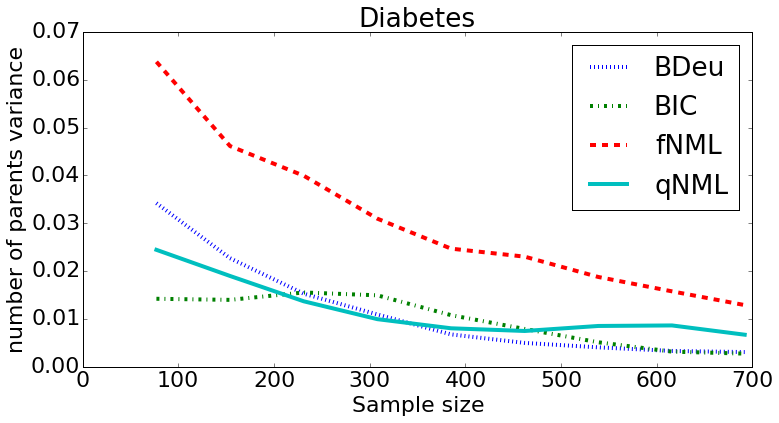

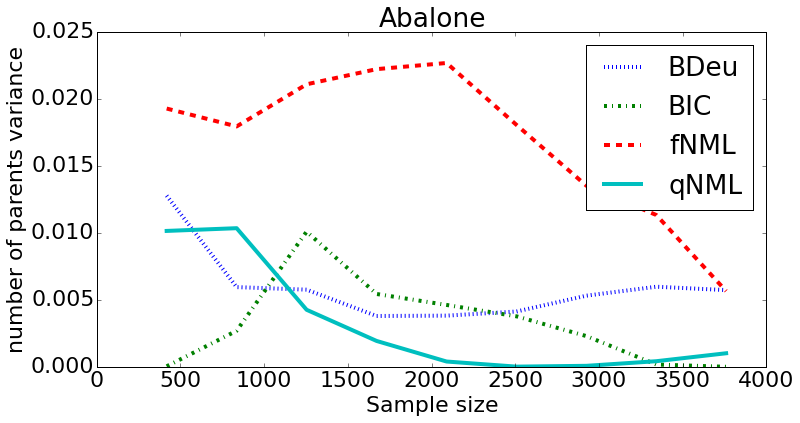

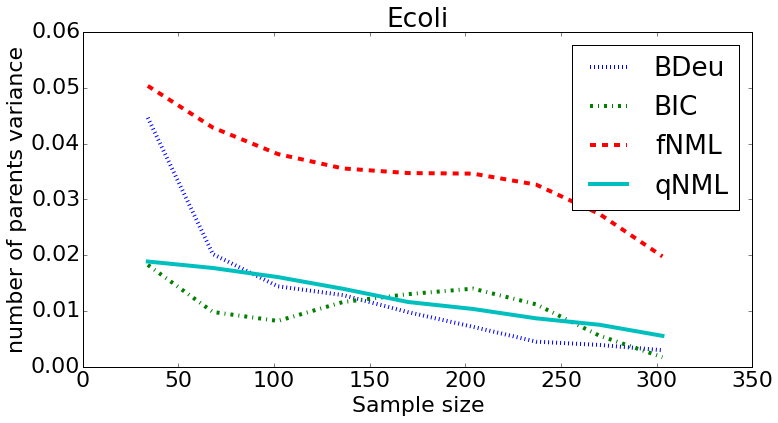

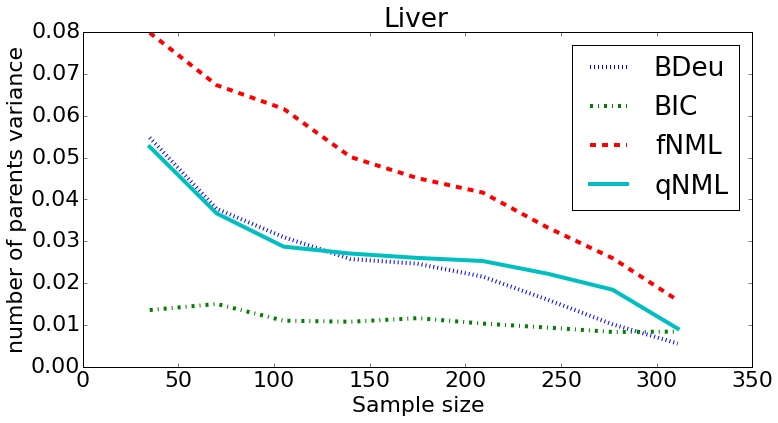

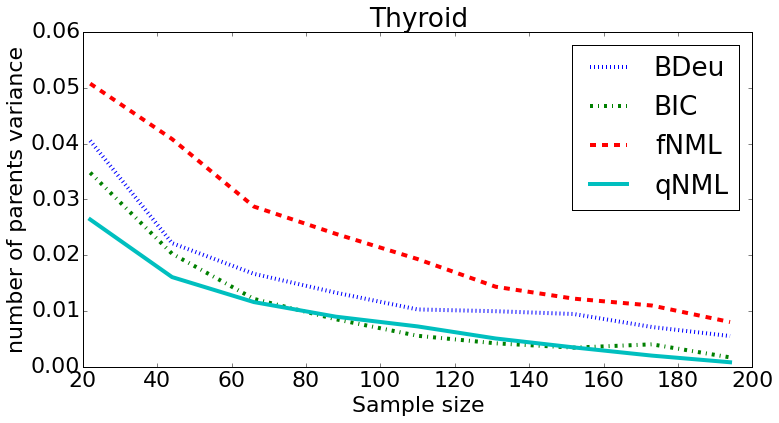

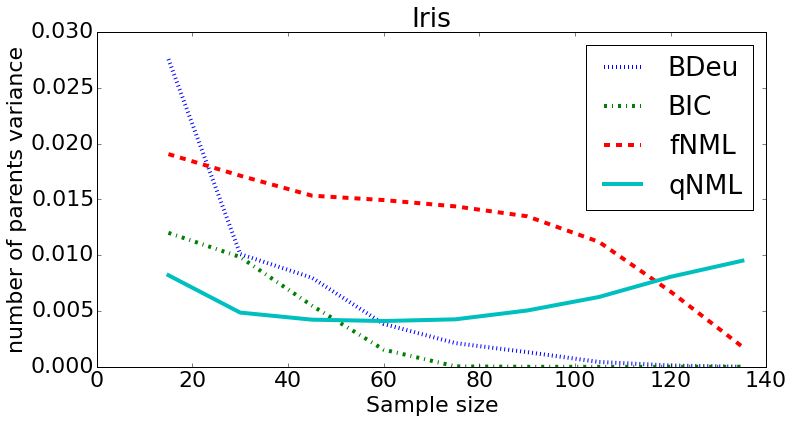

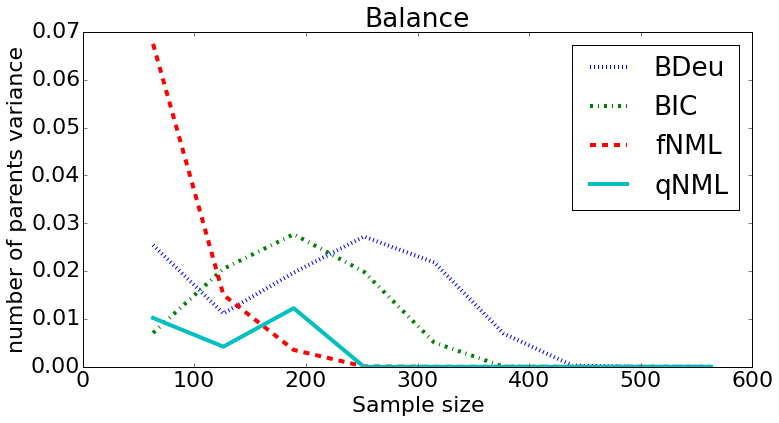

In [25]:
ss_image('average number of parents',4,np.mean,'mean')
ss_image('number of parents variance',4,np.var,'var')

## Producing table of results

In [26]:
sstarget4dn = dict([('adult', 5000),
 ('wine', 30),
 ('heart_statlog', 50),
 ('heart_hungarian', 50),
 ('heart_cleveland', 50),
 ('page_blocks', 500),
 ('glass', 50),
 ('bc_wisconsin', 100),
 ('tic_tac_toe', 100),
 ('shuttle', 500),
 ('breast_cancer', 50),
 ('yeast', 200),
 ('post_operative', 20),
 ('diabetes', 100),
 ('abalone', 500),
 ('ecoli', 50),
 ('liver', 50),
 ('thyroid', 50),
 ('iris', 20),
 ('balance', 100)])

def gen_ss4dn():

    for dn,sst in sstarget4dn.items():
        sss = get_sample_sizes(dn)
        # sss = np.array([l.split()[0] for l in open(os.path.join('res_qNML','fNML',dn,'100.ssp'))],dtype=int)
        print
        ssds = np.abs(sss-sst)
        yield dn, sss[ssds.argmin()]
    
ss4dn = dict(gen_ss4dn())
ss4dn


{'abalone': 418,
 'adult': 6513,
 'balance': 126,
 'bc_wisconsin': 70,
 'breast_cancer': 58,
 'diabetes': 77,
 'ecoli': 34,
 'glass': 44,
 'heart_cleveland': 62,
 'heart_hungarian': 60,
 'heart_statlog': 54,
 'iris': 15,
 'liver': 35,
 'page_blocks': 548,
 'post_operative': 18,
 'shuttle': 5800,
 'thyroid': 44,
 'tic_tac_toe': 96,
 'wine': 36,
 'yeast': 149}

In [28]:
def datainfo(dn):
    ff = os.path.join(datad,dn,dn+'.vd')
    df = os.path.join(datad,dn,dn+'.idt')
    return len(open(ff).readlines()),len(open(df).readlines())

data2nN = dict((dn,datainfo(dn)) for dn in datanames)

data2nN

{'abalone': (9, 4177),
 'adult': (15, 32561),
 'balance': (5, 625),
 'bc_wisconsin': (11, 699),
 'breast_cancer': (10, 286),
 'diabetes': (9, 768),
 'ecoli': (8, 336),
 'glass': (11, 214),
 'heart_cleveland': (14, 303),
 'heart_hungarian': (14, 294),
 'heart_statlog': (14, 270),
 'iris': (5, 150),
 'liver': (7, 345),
 'page_blocks': (11, 5473),
 'post_operative': (9, 90),
 'shuttle': (10, 58000),
 'thyroid': (6, 215),
 'tic_tac_toe': (10, 958),
 'wine': (14, 178),
 'yeast': (9, 1484)}

In [29]:


dnN = sorted([(dn,n,N) for dn,(n,N) in data2nN.items()], key=lambda x:x[2])

#frame = pd.DataFrame([(fmt_dn(dn),n,N) for dn,n,N in dnN], columns=["Data", "n", "N"])

sorted_dnames = [fmt_dn(dn) for dn,n,N in dnN]
print(sorted_dnames)
print([dn for dn,n,N in dnN])

#f=open("datainfo.tex","wb")
#f.write(frame.to_latex(index=False,escape=False))
#f.close()

['PostOperative', 'Iris', 'Wine', 'Glass', 'Thyroid', 'HeartStatlog', 'BreastCancer', 'HeartHungarian', 'HeartCleveland', 'Ecoli', 'Liver', 'Balance', 'BcWisconsin', 'Diabetes', 'TicTacToe', 'Yeast', 'Abalone', 'PageBlocks', 'Adult', 'Shuttle']
['post_operative', 'iris', 'wine', 'glass', 'thyroid', 'heart_statlog', 'breast_cancer', 'heart_hungarian', 'heart_cleveland', 'ecoli', 'liver', 'balance', 'bc_wisconsin', 'diabetes', 'tic_tac_toe', 'yeast', 'abalone', 'page_blocks', 'adult', 'shuttle']


In [ ]:
import pandas as pd
    
def boldformat(xs,fmt):
    minx = min(xs)
    return [fmt%x if x>minx else "\\textbf{%s}"%fmt%x for x in xs]

#def boldformat2(xs):
#    minx = min(xs)
#    return ["%d"%x if x>minx else "\\textbf{%d}"%x for x in xs]

def gen_resrow(dn,col,sign,fmt):
    ss = ss4dn[dn]
    means = []
    for st in scoretypes:
        ds = datas[(st,dn,col)]
        sss = get_sample_sizes(dn) 
        ssix = np.argwhere(sss==ss)
        means.append(sign*ds[:,ssix].mean())
    return [fmt_dn(dn),ss]+boldformat(means,fmt)


In [45]:
def gen_ranks(dn,col,sign):
    ss = ss4dn[dn]
    means = []
    for st in scoretypes:
        ds = datas[(st,dn,col)]
        sss = get_sample_sizes(dn)
        ssix = np.argwhere(sss==ss)
        means.append(sign*ds[:,ssix].mean())
    stypes = [s for (m,s) in sorted(zip(means,scoretypes))]
    return [stypes.index(st)+1 for st in scoretypes]


In [56]:
sdnames = sorted(datanames, key=lambda x: ss4dn[x])
for dn in sdnames:
    print(gen_resrow(dn,3,-1,'%.2f'))

['Iris', 15, '3.61', '3.56', '3.50', '\\textbf{3.47}']
['PostOperative', 18, '10.52', '\\textbf{7.45}', '8.35', '8.39']
['Ecoli', 34, '6.27', '6.16', '\\textbf{5.56}', '5.63']
['Liver', 35, '4.22', '\\textbf{4.01}', '4.10', '4.03']
['Wine', 36, '16.41', '\\textbf{11.27}', '12.07', '11.86']
['Glass', 44, '7.48', '6.65', '\\textbf{6.37}', '6.43']
['Thyroid', 44, '2.92', '2.93', '\\textbf{2.81}', '2.83']
['HeartStatlog', 54, '14.37', '\\textbf{10.96}', '11.98', '11.65']
['BreastCancer', 58, '11.21', '\\textbf{9.94}', '10.34', '10.37']
['HeartHungarian', 60, '9.21', '\\textbf{8.38}', '8.80', '8.61']
['HeartCleveland', 62, '14.88', '\\textbf{11.76}', '12.48', '12.18']
['BcWisconsin', 70, '6.41', '\\textbf{5.09}', '5.29', '5.28']
['Diabetes', 77, '5.11', '4.99', '5.09', '\\textbf{4.98}']
['TicTacToe', 96, '10.99', '\\textbf{10.35}', '10.72', '11.04']
['Balance', 126, '7.45', '7.42', '\\textbf{7.27}', '7.73']
['Yeast', 149, '5.67', '5.80', '\\textbf{5.48}', '5.49']
['Abalone', 418, '3.93', '4

In [57]:
import pandas as pd
restab = np.array([gen_resrow(dn,3,-1,'%.2f') for dn in sdnames])
frame = pd.DataFrame(restab, columns=["Data", "N"]+scoretypes)
frame

Data     N   BDeu             BIC            fNML           qNML
0             Iris    15   3.61            3.56            3.50  \textbf{3.47}
1    PostOperative    18  10.52   \textbf{7.45}            8.35           8.39
2            Ecoli    34   6.27            6.16   \textbf{5.56}           5.63
3            Liver    35   4.22   \textbf{4.01}            4.10           4.03
4             Wine    36  16.41  \textbf{11.27}           12.07          11.86
5            Glass    44   7.48            6.65   \textbf{6.37}           6.43
6          Thyroid    44   2.92            2.93   \textbf{2.81}           2.83
7     HeartStatlog    54  14.37  \textbf{10.96}           11.98          11.65
8     BreastCancer    58  11.21   \textbf{9.94}           10.34          10.37
9   HeartHungarian    60   9.21   \textbf{8.38}            8.80           8.61
10  HeartCleveland    62  14.88  \textbf{11.76}           12.48          12.18
11     BcWisconsin    70   6.41   \textbf{5.09}            5.29           5.28
12        Diabetes    77   5.11            4.99            5.09  \textbf{4.98}
13       TicTacToe    96  10.99  \textbf{10.35}           10.72          11.04
14         Balance   126   7.45            7.42   \textbf{7.27}           7.73
15           Yeast   149   5.67            5.80   \textbf{5.48}           5.49
16         Abalone   418   3.93            4.00   \textbf{3.88}           3.96
17      PageBlocks   548   2.36            2.40   \textbf{2.32}           2.38
18         Shuttle  5800   1.69            1.72   \textbf{1.69}           1.71
19           Adult  6513  10.16           10.25  \textbf{10.05}          10.08

In [58]:
np.array([gen_ranks(dn,3,-1) for dn in datanames]).mean(axis=0)

array([ 3.45,  2.3 ,  1.9 ,  2.35])

In [59]:
frame.to_csv(os.path.join(tbldir,'qNMLpredtab.csv'))

In [60]:
f=open(os.path.join(tbldir,"qNMLpredtab.tex"),"w")
f.write(frame.to_latex(index=False,escape=False))
f.close()


In [61]:
restab = np.array([gen_resrow(dn,2,1,'%d') for dn in sdnames])
frame = pd.DataFrame(restab, columns=["Data", "N"]+scoretypes)
frame

Data     N         BDeu           BIC  fNML qNML
0             Iris    15           37   \textbf{22}    32   29
1    PostOperative    18         1216   \textbf{19}   396  146
2            Ecoli    34          182   \textbf{30}   162   77
3            Liver    35           45   \textbf{15}    61   23
4             Wine    36        16483   \textbf{70}   806  204
5            Glass    44         1677   \textbf{48}   505   97
6          Thyroid    44           40   \textbf{23}    66   28
7     HeartStatlog    54        16861   \textbf{43}  1109  256
8     BreastCancer    58        25796   \textbf{49}  3767  843
9   HeartHungarian    60         1634   \textbf{42}   791   90
10  HeartCleveland    62        34366   \textbf{47}  1413  404
11     BcWisconsin    70         4630   \textbf{42}   603   89
12        Diabetes    77           38   \textbf{22}   216   34
13       TicTacToe    96        13700   \textbf{25}  1968  766
14         Balance   126  \textbf{20}            23    48  611
15           Yeast   149           71   \textbf{31}   264   75
16         Abalone   418           91   \textbf{46}   149   62
17      PageBlocks   548          681   \textbf{44}   379   56
18         Shuttle  5800          534   \textbf{99}   716  129
19           Adult  6513          699  \textbf{477}  1554  944

In [62]:
np.array([gen_ranks(dn,2,1) for dn in datanames]).mean(axis=0)

array([ 3.4 ,  1.05,  3.35,  2.2 ])

In [63]:
frame.to_csv(os.path.join(tbldir,"qNMLnptab.csv"))

In [64]:
f=open(os.path.join(tbldir,"qNMLnptab.tex"),"w")
f.write(frame.to_latex(index=False,escape=False))
f.close()


In [65]:
restab = np.array([gen_resrow(dn,4,1,'%.2f') for dn in sdnames])
frame = pd.DataFrame(restab, columns=["Data", "N"]+scoretypes)
frame

Data     N           BDeu            BIC  fNML  qNML
0             Iris    15           0.84  \textbf{0.63}  0.87  0.82
1    PostOperative    18           1.35  \textbf{0.11}  1.66  1.29
2            Ecoli    34           0.83  \textbf{0.30}  0.96  0.77
3            Liver    35           0.60  \textbf{0.10}  0.88  0.43
4             Wine    36           2.11  \textbf{0.75}  1.86  1.44
5            Glass    44           1.32  \textbf{0.38}  1.41  0.85
6          Thyroid    44           0.84  \textbf{0.48}  0.97  0.66
7     HeartStatlog    54           1.81  \textbf{0.56}  2.06  1.50
8     BreastCancer    58           1.27  \textbf{0.42}  1.71  1.39
9   HeartHungarian    60           0.93  \textbf{0.56}  1.55  1.04
10  HeartCleveland    62           1.69  \textbf{0.41}  1.96  1.33
11     BcWisconsin    70           2.02  \textbf{0.76}  1.96  1.14
12        Diabetes    77           0.55  \textbf{0.23}  1.04  0.58
13       TicTacToe    96           1.60  \textbf{0.21}  2.32  2.47
14         Balance   126  \textbf{0.06}           0.15  0.71  1.18
15           Yeast   149           0.54  \textbf{0.14}  0.78  0.45
16         Abalone   418           1.20  \textbf{0.78}  1.49  0.93
17      PageBlocks   548           1.67  \textbf{0.38}  1.17  0.49
18         Shuttle  5800           2.02  \textbf{1.05}  1.84  1.14
19           Adult  6513           1.34  \textbf{1.11}  1.59  1.36

In [66]:
np.array([gen_ranks(dn,2,1) for dn in datanames]).mean(axis=0)

array([ 3.4 ,  1.05,  3.35,  2.2 ])

In [67]:
frame.to_csv(os.path.join(tbldir,"qNMLpartab.csv"))
f=open(os.path.join(tbldir,"qNMLpartab.tex"),"w")
f.write(frame.to_latex(index=False,escape=False))
f.close()


In [68]:
print(frame)

              Data     N           BDeu            BIC  fNML  qNML
0             Iris    15           0.84  \textbf{0.63}  0.87  0.82
1    PostOperative    18           1.35  \textbf{0.11}  1.66  1.29
2            Ecoli    34           0.83  \textbf{0.30}  0.96  0.77
3            Liver    35           0.60  \textbf{0.10}  0.88  0.43
4             Wine    36           2.11  \textbf{0.75}  1.86  1.44
5            Glass    44           1.32  \textbf{0.38}  1.41  0.85
6          Thyroid    44           0.84  \textbf{0.48}  0.97  0.66
7     HeartStatlog    54           1.81  \textbf{0.56}  2.06  1.50
8     BreastCancer    58           1.27  \textbf{0.42}  1.71  1.39
9   HeartHungarian    60           0.93  \textbf{0.56}  1.55  1.04
10  HeartCleveland    62           1.69  \textbf{0.41}  1.96  1.33
11     BcWisconsin    70           2.02  \textbf{0.76}  1.96  1.14
12        Diabetes    77           0.55  \textbf{0.23}  1.04  0.58
13       TicTacToe    96           1.60  \textbf{0.21}  2.32  